In [1]:
# Importing Libraries:
import pandas as pd
import openpyxl
import os
import sqlalchemy
import pymysql
import sqlalchemy as db
import sqlitecloud
import numpy as np
from numpy import sqrt 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import optimize
import csv
import itertools
from collections import ChainMap
import unittest

# Primary Data Analysis:

In [2]:
class Importing_Datasets:
    
    def __init__ (self, filename):
        
        '''Initializing of the Data Variable to receive the datasets called in this class instance. The importing of the data
        called in the class instance. And the and except error handling for non-existing files, empty files and files of 
        incorrect format.''' 
        try:
            self.data = pd.read_csv(filename)
            print(self.data.columns) 
            
        except FileNotFoundError:
            raise Exception(f"The File titled {filename} is not found.")
            
        except pd.errors.EmptyDataError:
            raise Exception("The Selected File is empty")
            
        except pd.errors.ParserError:
            raise Exception("The Selected File format is incorrect")
            
        return
    
    # Calculate the mean of one of the columns in the dataset of the file that has been import through an instance of this class.
    def mean(self):
        
        mean_input = self.data["y1"].mean()      
        return mean_input

    # Importing of the Dataset that is called in an instance of the file. 
    def import_datasets(self, filename):
        
        self.data = pd.read_csv(filename)
        display(self.data.head())
        return self.data

## The names of the columns in the dataset and the mean value of one of the columns in the dataset for testing:

In [3]:
train_data = Importing_Datasets("train.csv")

train_data_mean = train_data.mean()
print("Mean (Average)", train_data_mean)

Index(['x', 'y1', 'y2', 'y3', 'y4'], dtype='object')
Mean (Average) 0.10766606164249813


## Importing of the Train Dataset:

In [4]:
train_dataset = train_data.import_datasets("train.csv")

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076


## Description of the Train Dataset:

In [5]:
train_dataset.describe()

,x,y1,y2,y3,y4
count,400.00000,400.000000,400.000000,400.000000,400.000000
mean,-0.05000,0.107666,-0.094239,-0.051628,0.012633
std,11.56143,23.103285,23.111794,11.560369,0.327063
min,-20.00000,-39.724934,-40.078590,-20.214268,-0.744510
25%,-10.02500,-20.312566,-19.642560,-9.999807,-0.198240
50%,-0.05000,0.367844,-0.000603,-0.155205,0.024634
75%,9.92500,19.606209,19.478971,9.992209,0.236008
max,19.90000,40.151100,40.558865,19.840752,0.742489


## Importing of the Ideal Dataset:

In [6]:
ideal_dataset = train_data.import_datasets("ideal.csv")

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


## Description of the Ideal Dataset:

In [7]:
ideal_dataset.describe()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.05000,-0.002282,0.045609,9.997718,5.045609,-9.997718,0.002282,-0.054391,0.030726,0.091218,...,-0.101141,0.122805,1.933863,-0.010131,11.933863,4.236448,-4.236448,-0.000466,0.029571,0.040336
std,11.56143,0.701386,0.713074,0.701386,0.713074,0.701386,0.701386,0.721907,0.717805,1.426147,...,23.109814,23.126395,1.814762,0.001190,1.814762,1.814762,1.814762,0.178079,0.700764,0.628002
min,-20.00000,-0.999990,-0.999968,9.000010,4.000032,-10.999990,-0.999990,-0.999965,-0.999998,-1.999937,...,-40.456474,-39.551407,-28.889038,-0.012484,-18.889038,-26.586452,-5.298317,-0.249998,-0.999990,-0.841454
25%,-10.02500,-0.695113,-0.669387,9.304887,4.330613,-10.689206,-0.689206,-0.801144,-0.672318,-1.338774,...,-19.767859,-20.288331,1.609438,-0.011102,11.609438,3.912023,-5.010635,-0.179723,-0.682927,-0.620496
50%,-0.05000,-0.003982,0.095868,9.996018,5.095868,-9.996018,0.003982,-0.095871,0.038803,0.191735,...,-0.124958,0.598751,2.302585,-0.009995,12.302585,4.605170,-4.605170,-0.001106,0.099833,0.095717
75%,9.92500,0.689206,0.753902,10.689206,5.753902,-9.304887,0.695113,0.672522,0.775285,1.507804,...,19.610421,19.637776,2.708050,-0.009089,12.708050,5.010635,-3.912023,0.178177,0.722881,0.684489
max,19.90000,0.999990,1.000000,10.999990,6.000000,-9.000010,0.999990,1.000000,0.999993,2.000000,...,40.233820,40.204040,2.995732,-0.008333,12.995732,5.298317,26.586452,0.249998,0.999574,0.841471


## Column names of the ideal Dataset: 

In [8]:
Importing_Datasets("ideal.csv")

Index(['x', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11',
       'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21',
       'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30', 'y31',
       'y32', 'y33', 'y34', 'y35', 'y36', 'y37', 'y38', 'y39', 'y40', 'y41',
       'y42', 'y43', 'y44', 'y45', 'y46', 'y47', 'y48', 'y49', 'y50'],
      dtype='object')


## Column names of the Test Dataset:

In [9]:
test_Data = Importing_Datasets("test.csv")

Index(['x', 'y'], dtype='object')


## Importing of the Test Dataset:

In [10]:
test_dataset = train_data.import_datasets("test.csv")

,x,y
0,17.5,34.161040
1,0.3,1.215102
2,-8.7,-16.843908
3,-19.2,-37.170870
4,-11.0,-20.263054


## Description of the Test Dataset:

In [11]:
test_dataset.describe()

,x,y
count,100.000000,100.000000
mean,0.299000,0.325483
std,12.039501,20.745993
min,-20.000000,-40.449770
25%,-9.775000,-14.091911
50%,-0.500000,-0.038432
75%,11.700000,15.968556
max,19.700000,38.955273


# Linear Regression Model Training:

In [12]:
class LinearRegressionModel:
    
    # Intializing of variables to receive ideal and train datasets from the Importing_Datasets Class:
    def __init__(self, _ideal_dataset, _train_dataset):

        self.df = _ideal_dataset
        self.df_train = _train_dataset
        self.X_ideal, self.Y_ideal = None, None
        self.model = None
        self.lin_reg = LinearRegression()
        
    # Method to return the output of the Ideal Dataset reeived from the Importing_Datasets Class:
    def Ideal_Dataset(self):
   
        return self.df

    # Method to return the output of the Train Dataset reeived from the Importing_Datasets Class:
    def Train_Dataset(self):
        
        return self.df_train

    # Method to train ideal dataset.
    def train_model(self):
        
        # Use Linear Regression to train the model to find all 50 ideal functions equations:
        self.X_ideal = self.df[['x']]
        self.Y_ideal = self.df.iloc[:,1:]
        
        # Linear Regression Fitting of Ideal Training Data:
        self.lr_model_normal_ideal = self.lin_reg.fit(self.X_ideal, self.Y_ideal)
        
        # Linear Regression Model Coefficients:
        self.coef_ideal = self.lr_model_normal_ideal.coef_
        self.df_coef_ideal = pd.DataFrame(self.coef_ideal)
        self.df_coef_ideal.columns = ["x"]
        print("Trained Model's Coefficients (Head). Please note that each row represents a coefficient for each of the ideal functions")
        display(self.df_coef_ideal.head())
        print("=============================================================================================================")
        print("Description of the Model's Coefficients DataFrame.")
        display(self.df_coef_ideal.describe())
        print("=============================================================================================================")
        
        # Linear Regression Model Y-Intercepts:
        self.intcpt_ideal = self.lr_model_normal_ideal.intercept_
        self.df_intcpt_ideal = pd.DataFrame(self.intcpt_ideal)
        self.df_intcpt_ideal.columns = ["x"]
        print("Trained Model's Y-Intercepts (Head). Please note that each row represents a Y-Intercept for each of the ideal functions")
        display(self.df_intcpt_ideal.head())
        print("=============================================================================================================")
        print("Description of the Model's Y-Intercepts DataFrame.")
        display(self.df_intcpt_ideal.describe())
        print("=============================================================================================================")
        
        return         

## Importing of both Train and Ideal Datasets from the "Importing_Datasets Class"

In [13]:
lrm = LinearRegressionModel(ideal_dataset, train_dataset)

## Diplaying the head of the Ideal Dataset:

In [14]:
Ideal_Dataset_Output = lrm.Ideal_Dataset()
Ideal_Dataset_Output.head()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902


## Display the head of the Train Dataset:

In [15]:
Train_Dataset_Output = lrm.Train_Dataset()
Train_Dataset_Output.head()

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076


## Training of the Ideal Datasets to obtain the Coefficients and Intercepts for the 50 ideal functions to be used in the Ideal_Functions Class

In [16]:
lrm1 = lrm.train_model()

Trained Model's Coefficients (Head). Please note that each row represents a coefficient for each of the ideal functions


,x
0,-0.002716
1,-0.000136
2,-0.002716
3,-0.000136
4,0.002716


Description of the Model's Coefficients DataFrame.


,x
count,50.000000
mean,38.150770
std,149.288757
min,-252.604000
25%,-0.006175
50%,-0.000302
75%,0.075938
max,720.012001


Trained Model's Y-Intercepts (Head). Please note that each row represents a Y-Intercept for each of the ideal functions


,x
0,-0.002418
1,0.045602
2,9.997582
3,5.045602
4,-9.997582


Description of the Model's Y-Intercepts DataFrame.


,x
count,50.000000
mean,88.602158
std,326.552212
min,-269.659800
25%,-0.038550
50%,0.042966
75%,10.317259
max,1999.937500


# Setting Up Ideal Dataset Functions and Finding the Four Ideal Functions for Train Dataset:

In [17]:
class Ideal_Functions(LinearRegressionModel):

    '''Setting up the Equations of the the 50 Ideal Functions from the Ideal Datasets. The Coefficients and Y-Intercepts outputs
    from the LinearRegressionModel class were used to set up the below equations'''
    def ideal_ln_equations(self):
        
        self.y1_ideal_pred = (self.df_coef_ideal.iloc[0] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[0]
        self.y2_ideal_pred = (self.df_coef_ideal.iloc[1] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[1]
        self.y3_ideal_pred = (self.df_coef_ideal.iloc[2] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[2]
        self.y4_ideal_pred = (self.df_coef_ideal.iloc[3] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[3]
        self.y5_ideal_pred = (self.df_coef_ideal.iloc[4] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[4]
        self.y6_ideal_pred = (self.df_coef_ideal.iloc[5] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[5]
        self.y7_ideal_pred = (self.df_coef_ideal.iloc[6] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[6]
        self.y8_ideal_pred = (self.df_coef_ideal.iloc[7] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[7]
        self.y9_ideal_pred = (self.df_coef_ideal.iloc[8] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[8]
        self.y10_ideal_pred = (self.df_coef_ideal.iloc[9] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[9]
        self.y11_ideal_pred = (self.df_coef_ideal.iloc[10] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[10]
        self.y12_ideal_pred = (self.df_coef_ideal.iloc[11] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[11]
        self.y13_ideal_pred = (self.df_coef_ideal.iloc[12] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[12]
        self.y14_ideal_pred = (self.df_coef_ideal.iloc[13] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[13]
        self.y15_ideal_pred = (self.df_coef_ideal.iloc[14] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[14]
        self.y16_ideal_pred = (self.df_coef_ideal.iloc[15] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[15]
        self.y17_ideal_pred = (self.df_coef_ideal.iloc[16] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[16]
        self.y18_ideal_pred = (self.df_coef_ideal.iloc[17] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[17]
        self.y19_ideal_pred = (self.df_coef_ideal.iloc[18] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[18]
        self.y20_ideal_pred = (self.df_coef_ideal.iloc[19] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[19]
        self.y21_ideal_pred = (self.df_coef_ideal.iloc[20] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[20]
        self.y22_ideal_pred = (self.df_coef_ideal.iloc[21] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[21]
        self.y23_ideal_pred = (self.df_coef_ideal.iloc[22] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[22]
        self.y24_ideal_pred = (self.df_coef_ideal.iloc[23] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[23]
        self.y25_ideal_pred = (self.df_coef_ideal.iloc[24] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[24]
        self.y26_ideal_pred = (self.df_coef_ideal.iloc[25] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[25]
        self.y27_ideal_pred = (self.df_coef_ideal.iloc[26] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[26]
        self.y28_ideal_pred = (self.df_coef_ideal.iloc[27] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[27]
        self.y29_ideal_pred = (self.df_coef_ideal.iloc[28] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[28]
        self.y30_ideal_pred = (self.df_coef_ideal.iloc[29] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[29]
        self.y31_ideal_pred = (self.df_coef_ideal.iloc[30] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[30]
        self.y32_ideal_pred = (self.df_coef_ideal.iloc[31] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[31]
        self.y33_ideal_pred = (self.df_coef_ideal.iloc[32] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[32]
        self.y34_ideal_pred = (self.df_coef_ideal.iloc[33] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[33]
        self.y35_ideal_pred = (self.df_coef_ideal.iloc[34] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[34]
        self.y36_ideal_pred = (self.df_coef_ideal.iloc[35] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[35]
        self.y37_ideal_pred = (self.df_coef_ideal.iloc[36] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[36]
        self.y38_ideal_pred = (self.df_coef_ideal.iloc[37] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[37]
        self.y39_ideal_pred = (self.df_coef_ideal.iloc[38] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[38]
        self.y40_ideal_pred = (self.df_coef_ideal.iloc[39] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[39]
        self.y41_ideal_pred = (self.df_coef_ideal.iloc[40] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[40]
        self.y42_ideal_pred = (self.df_coef_ideal.iloc[41] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[41]
        self.y43_ideal_pred = (self.df_coef_ideal.iloc[42] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[42]
        self.y44_ideal_pred = (self.df_coef_ideal.iloc[43] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[43]
        self.y45_ideal_pred = (self.df_coef_ideal.iloc[44] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[44]
        self.y46_ideal_pred = (self.df_coef_ideal.iloc[45] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[45]
        self.y47_ideal_pred = (self.df_coef_ideal.iloc[46] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[46]
        self.y48_ideal_pred = (self.df_coef_ideal.iloc[47] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[47]
        self.y49_ideal_pred = (self.df_coef_ideal.iloc[48] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[48]
        self.y50_ideal_pred = (self.df_coef_ideal.iloc[49] * self.X_ideal[["x"]]) + self.df_intcpt_ideal.iloc[49]
      
        # Renaming of the Columns Representing the 50 Ideal Equations to Reflect Their Names Correctly.
        self.y1_ideal_pred.rename(columns={"x":"y1"}, inplace = True)
        self.y2_ideal_pred.rename(columns={"x":"y2"}, inplace = True)
        self.y3_ideal_pred.rename(columns={"x":"y3"}, inplace = True)
        self.y4_ideal_pred.rename(columns={"x":"y4"}, inplace = True)
        self.y5_ideal_pred.rename(columns={"x":"y5"}, inplace = True)
        self.y6_ideal_pred.rename(columns={"x":"y6"}, inplace = True)
        self.y7_ideal_pred.rename(columns={"x":"y7"}, inplace = True)
        self.y8_ideal_pred.rename(columns={"x":"y8"}, inplace = True)
        self.y9_ideal_pred.rename(columns={"x":"y9"}, inplace = True)
        self.y10_ideal_pred.rename(columns={"x":"y10"}, inplace = True)
        self.y11_ideal_pred.rename(columns={"x":"y11"}, inplace = True)
        self.y12_ideal_pred.rename(columns={"x":"y12"}, inplace = True)
        self.y13_ideal_pred.rename(columns={"x":"y13"}, inplace = True)
        self.y14_ideal_pred.rename(columns={"x":"y14"}, inplace = True)
        self.y15_ideal_pred.rename(columns={"x":"y15"}, inplace = True)
        self.y16_ideal_pred.rename(columns={"x":"y16"}, inplace = True)
        self.y17_ideal_pred.rename(columns={"x":"y17"}, inplace = True)
        self.y18_ideal_pred.rename(columns={"x":"y18"}, inplace = True)
        self.y19_ideal_pred.rename(columns={"x":"y19"}, inplace = True)
        self.y20_ideal_pred.rename(columns={"x":"y20"}, inplace = True)
        self.y21_ideal_pred.rename(columns={"x":"y21"}, inplace = True)
        self.y22_ideal_pred.rename(columns={"x":"y22"}, inplace = True)
        self.y23_ideal_pred.rename(columns={"x":"y23"}, inplace = True)
        self.y24_ideal_pred.rename(columns={"x":"y24"}, inplace = True)
        self.y25_ideal_pred.rename(columns={"x":"y25"}, inplace = True)
        self.y26_ideal_pred.rename(columns={"x":"y26"}, inplace = True)
        self.y27_ideal_pred.rename(columns={"x":"y27"}, inplace = True)
        self.y28_ideal_pred.rename(columns={"x":"y28"}, inplace = True)
        self.y29_ideal_pred.rename(columns={"x":"y29"}, inplace = True)
        self.y30_ideal_pred.rename(columns={"x":"y30"}, inplace = True)
        self.y31_ideal_pred.rename(columns={"x":"y31"}, inplace = True)
        self.y32_ideal_pred.rename(columns={"x":"y32"}, inplace = True)
        self.y33_ideal_pred.rename(columns={"x":"y33"}, inplace = True)
        self.y34_ideal_pred.rename(columns={"x":"y34"}, inplace = True)
        self.y35_ideal_pred.rename(columns={"x":"y35"}, inplace = True)
        self.y36_ideal_pred.rename(columns={"x":"y36"}, inplace = True)
        self.y37_ideal_pred.rename(columns={"x":"y37"}, inplace = True)
        self.y38_ideal_pred.rename(columns={"x":"y38"}, inplace = True)
        self.y39_ideal_pred.rename(columns={"x":"y39"}, inplace = True)
        self.y40_ideal_pred.rename(columns={"x":"y40"}, inplace = True)
        self.y41_ideal_pred.rename(columns={"x":"y41"}, inplace = True)
        self.y42_ideal_pred.rename(columns={"x":"y42"}, inplace = True)
        self.y43_ideal_pred.rename(columns={"x":"y43"}, inplace = True)
        self.y44_ideal_pred.rename(columns={"x":"y44"}, inplace = True)
        self.y45_ideal_pred.rename(columns={"x":"y45"}, inplace = True)
        self.y46_ideal_pred.rename(columns={"x":"y46"}, inplace = True)
        self.y47_ideal_pred.rename(columns={"x":"y47"}, inplace = True)
        self.y48_ideal_pred.rename(columns={"x":"y48"}, inplace = True)
        self.y49_ideal_pred.rename(columns={"x":"y49"}, inplace = True)
        self.y50_ideal_pred.rename(columns={"x":"y50"}, inplace = True)        

        # Concatinating the 50 Predicted Ideal Functions Outputs Into One DataFrame for Dislaying and Usage
        self.pred_ideal_data = pd.concat([self.X_ideal["x"], self.y1_ideal_pred, self.y2_ideal_pred, self.y3_ideal_pred, 
                                     self.y4_ideal_pred, self.y5_ideal_pred, self.y6_ideal_pred, self.y7_ideal_pred, 
                                     self.y8_ideal_pred, self.y9_ideal_pred, self.y10_ideal_pred, self.y11_ideal_pred, 
                                     self.y12_ideal_pred, self.y13_ideal_pred, self.y14_ideal_pred, self.y15_ideal_pred, 
                                     self.y16_ideal_pred, self.y17_ideal_pred, self.y18_ideal_pred, self.y19_ideal_pred, 
                                     self.y20_ideal_pred, self.y21_ideal_pred, self.y22_ideal_pred, self.y23_ideal_pred, 
                                     self.y24_ideal_pred, self.y25_ideal_pred, self.y26_ideal_pred, self.y27_ideal_pred, 
                                     self.y28_ideal_pred, self.y29_ideal_pred, self.y30_ideal_pred, self.y31_ideal_pred, 
                                     self.y32_ideal_pred, self.y33_ideal_pred, self.y34_ideal_pred, self.y35_ideal_pred, 
                                     self.y36_ideal_pred, self.y37_ideal_pred, self.y38_ideal_pred, self.y39_ideal_pred, 
                                     self.y40_ideal_pred, self.y41_ideal_pred, self.y42_ideal_pred, self.y43_ideal_pred, 
                                     self.y44_ideal_pred, self.y45_ideal_pred, self.y46_ideal_pred, self.y47_ideal_pred, 
                                     self.y48_ideal_pred, self.y49_ideal_pred, self.y50_ideal_pred], axis=1, join='inner')
        
        display(self.pred_ideal_data)       
        return self.pred_ideal_data
    

    # Select the final four predicted ideal functions for training data:
    
    # Method to derive first ideal function:
    def first_ideal_funcs(self):
        
        # IDEAL FUNCTION 1:
        
        # Create Least Squares Error Table Using Pred Table and Column df_training_data["y1"]:
        self.error_table_y1 = self.pred_ideal_data.iloc[:,1:].sub(self.df_train["y1"], axis = 0)
        print("Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y1 from Train Dataset shown below")
        display(self.error_table_y1.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Square up all values in Error Table:
        self.error_table_y1_sq = self.error_table_y1**2
        print("Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y1 from Train Dataset shown below")
        display(self.error_table_y1_sq.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Sum up all columns to find total least of squares by column:
        self.error_sum_y1 = pd.DataFrame(self.error_table_y1_sq.sum())
        self.error_sum_y1.columns = ['Sum off all Errors Per Ideal Function Columns']
        print("Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y1) shown below")
        display(self.error_sum_y1.tail(10))
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        
        # Find smallest least squares value coefficient:
        self.min_error_sum_y1 = min(self.error_sum_y1['Sum off all Errors Per Ideal Function Columns'])
        
        # Print Ideal Function Name producing the smallest least square value:
        self.row_index_y1 = self.error_sum_y1.index[self.error_sum_y1['Sum off all Errors Per Ideal Function Columns'] == self.min_error_sum_y1].tolist()
        
        # Print Final Result Showing Selected Ideal Function for Training Data Column (Function) "y1":
        print("==========================================================================================================")
        print("==========================================================================================================")
        print("Final Ideal Function Selected for column y1 from Training Dataset:")
        print("==========================================================================================================")
        print("Ideal Function {} produced the smallest least square value for training data column y1: {}".format(self.row_index_y1[0], self.min_error_sum_y1))
        print("Hence the Best Ideal function for training column y1 is function: {}".format(self.row_index_y1[0]))
        

    # Method to derive second ideal function:
    def second_ideal_funcs(self):
        
        # IDEAL FUNCTION 2:
        
        # Create Least Squares Error Table Using Pred Table and Column df_training_data["y2"]:
        self.error_table_y2 = self.pred_ideal_data.iloc[:,1:].sub(self.df_train["y2"], axis = 0)
        print("Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y2 from Train Dataset shown below")
        display(self.error_table_y2.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Square up all values in Error Table:
        self.error_table_y2_sq = self.error_table_y2**2
        print("Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y2 from Train Dataset shown below")
        display(self.error_table_y2_sq.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Sum up all columns to find total least of squares by column:
        self.error_sum_y2 = pd.DataFrame(self.error_table_y2_sq.sum())
        self.error_sum_y2.columns = ['Sum off all Errors Per Ideal Function Columns']
        print("Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y2) shown below")
        display(self.error_sum_y2.tail(10))
        print("==========================================================================================================")
        print("==========================================================================================================")
               
        # Find smallest least squares value coefficient:
        self.min_error_sum_y2 = min(self.error_sum_y2['Sum off all Errors Per Ideal Function Columns'])
        
        # Print Ideal Function Name producing the smallest least square value:
        self.row_index_y2 = self.error_sum_y2.index[self.error_sum_y2['Sum off all Errors Per Ideal Function Columns'] == self.min_error_sum_y2].tolist()
        
        # Print Final Result Showing Selected Ideal Function for Training Data Column (Function) "y2":
        print("==========================================================================================================")
        print("==========================================================================================================")
        print("Final Ideal Function Selected for column y2 from Training Dataset:")
        print("==========================================================================================================")
        print("Ideal Function {} produced the smallest least square value for training data column y2: {}".format(self.row_index_y2[0], self.min_error_sum_y2))
        print("Hence the Best Ideal function for training column y2 is function: {}".format(self.row_index_y2[0]))
        

    # Method to derive third ideal function:
    def third_ideal_funcs(self):
        
        # IDEAL FUNCTION 3:
        
        # Create Least Squares Error Table Using Pred Table and Column df_training_data["y3"]:
        self.error_table_y3 = self.pred_ideal_data.iloc[:,1:].sub(self.df_train["y3"], axis = 0)
        print("Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y3 from Train Dataset shown below")
        display(self.error_table_y3.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Square up all values in Error Table:
        self.error_table_y3_sq = self.error_table_y3**2
        print("Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y3 from Train Dataset shown below")
        display(self.error_table_y3_sq.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Sum up all columns to find total least of squares by column:
        self.error_sum_y3 = pd.DataFrame(self.error_table_y3_sq.sum())
        self.error_sum_y3.columns = ['Sum off all Errors Per Ideal Function Columns']
        print("Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y3) shown below")
        display(self.error_sum_y3.head(12))
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Find smallest least squares value coefficient:
        self.min_error_sum_y3 = min(self.error_sum_y3['Sum off all Errors Per Ideal Function Columns'])

        # Print Ideal Function Name producing the smallest least square value:
        self.row_index_y3 = self.error_sum_y3.index[self.error_sum_y3['Sum off all Errors Per Ideal Function Columns'] == self.min_error_sum_y3].tolist()
        
        # Print Final Result Showing Selected Ideal Function for Training Data Column (Function) "y3":
        print("==========================================================================================================")
        print("==========================================================================================================")
        print("Final Ideal Function Selected for column y3 from Training Dataset:")
        print("==========================================================================================================")
        print("Ideal Function {} produced the smallest least square value for training data column y3: {}".format(self.row_index_y3[0], self.min_error_sum_y3))
        print("Hence the Best Ideal function for training column y3 is function: {}".format(self.row_index_y3[0]))
        

    # Method to derive fourth ideal function:
    def fourth_ideal_funcs(self):
        
        # IDEAL FUNCTION 4:
        
        # Create Least Squares Error Table Using Pred Table and Column df_training_data["y4"]:
        self.error_table_y4 = self.pred_ideal_data.iloc[:,1:].sub(self.df_train["y4"], axis = 0)
        print("Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y4 from Train Dataset shown below")
        display(self.error_table_y4.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Square up all values in Error Table:
        self.error_table_y4_sq = self.error_table_y4**2
        print("Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y4 from Train Dataset shown below")
        display(self.error_table_y4_sq.head())
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Sum up all columns to find total least of squares by column:
        self.error_sum_y4 = pd.DataFrame(self.error_table_y4_sq.sum())
        self.error_sum_y4.columns = ['Sum off all Errors Per Ideal Function Columns']
        print("Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y4) shown below")
        display(self.error_sum_y4.tail(10))
        print("==========================================================================================================")
        print("==========================================================================================================")
        
        # Find smallest least squares value coefficient:
        self.min_error_sum_y4 = min(self.error_sum_y4['Sum off all Errors Per Ideal Function Columns'])
        
        # Print Ideal Function Name producing the smallest least square value:
        self.row_index_y4 = self.error_sum_y4.index[self.error_sum_y4['Sum off all Errors Per Ideal Function Columns'] == self.min_error_sum_y4].tolist()
        
        # Print Final Result Showing Selected Ideal Function for Training Data Column (Function) "y4":
        print("==========================================================================================================")
        print("==========================================================================================================")
        print("Final Ideal Function Selected for column y4 from Training Dataset:")
        print("==========================================================================================================")
        print("Ideal Function {} produced the smallest least square value for training data column y4: {}".format(self.row_index_y4[0], self.min_error_sum_y4))
        print("Hence the Best Ideal function for training column y4 is function: {}".format(self.row_index_y4[0]))


    # Method to combined the final four predicted ideal functions into 1 Dataframe for displaying and usage:
    def final4_ideal_funcs(self):
        
        # Final Four Ideal Functions Selected:
        print("The final four Ideal Functions selected are the following: ")
        print("Training Column y1, Ideal Function: ",format(self.row_index_y1[0]))
        print("Training Column y2, Ideal Function: ",format(self.row_index_y2[0]))
        print("Training Column y3, Ideal Function: ",format(self.row_index_y3[0]))
        print("Training Column y4, Ideal Function: ",format(self.row_index_y4[0]))
        
        # Final Four Ideal Regression Function Predictions:
        self.final_4_ideal_pred = self.pred_ideal_data[['x','y42','y41','y11','y48']]
        print("----------------------------------------------------------")
        print("----------------------------------------------------------")
        print("Table Showing The Predictions Of The Four Ideal Functions:")
        display(self.final_4_ideal_pred)
        
        return self.final_4_ideal_pred

        
    # Error Tables from Subtraction of Training Data Per Columns (e.g. Y1) from All Ideal Functions in Ideal Dataset:
    def org_error_table(self):
        
        self.or_err_table = pd.concat([self.pred_ideal_data['x'], self.error_table_y1['y42'], self.error_table_y2['y41'], 
                                       self.error_table_y3['y11'], self.error_table_y4['y48']], axis=1, join='inner')
        
        display(self.or_err_table.head())
        return self.or_err_table    
    
    # Method to create a visual comparing Train Y1 function points to the Predicted Ideal Function Y42 selected for it. 
    def train_Y1_vs_ideal_Y42_func(self):
              
        self.x_axis = self.final_4_ideal_pred["x"]
        self.y_axis = self.final_4_ideal_pred["y42"]
        self.z_axis = self.df_train["y1"]

        # The title of the line graph (plot) 
        plt.title("Y1 Training Function vs Y42 Ideal Function") 
  
        # Scatter plot of X values vs Y1-Train Function
        plt.scatter(self.x_axis, self.z_axis, label = "Y1 Training Function")

        # Line plot of X values vs Y42- Predicted Ideal Function
        plt.plot(self.x_axis, self.y_axis, label = "Y42 Ideal Function Predicted LR Line", color = "red")
        plt.legend()

        plt.ylabel("Y-Axis")
        plt.xlabel("X-Axis")
        
        plt.show()
        
        
    # Method to create a visual comparing Train Y2 function points to the Predicted Ideal Function Y41 selected for it. 
    def train_Y2_vs_ideal_Y41_func(self):
              
        self.x_axis = self.final_4_ideal_pred["x"]
        self.y_axis = self.final_4_ideal_pred["y41"]
        self.z_axis = self.df_train["y2"]

        # The title of the line graph (plot)  
        plt.title("Y2 Training Function vs Y41 Ideal Function") 
  
        # Scatter plot of X values vs Y2-Train Function 
        plt.scatter(self.x_axis, self.z_axis, label = "Y2 Training Function")
  
        # Line plot of X values vs Y41- Predicted Ideal Function
        plt.plot(self.x_axis, self.y_axis, label = "Y41 Ideal Function Predicted LR Line", color = "red")
        plt.legend()

        plt.ylabel("Y-Axis")
        plt.xlabel("X-Axis")
        
        plt.show()
        

    # Method to create a visual comparing Train Y3 function points to the Predicted Ideal Function Y11 selected for it.
    def train_Y3_vs_ideal_Y11_func(self):
              
        self.x_axis = self.final_4_ideal_pred["x"]
        self.y_axis = self.final_4_ideal_pred["y11"]
        self.z_axis = self.df_train["y3"]

        # The title of the line graph (plot)  
        plt.title("Y3 Training Function vs Y11 Ideal Function") 
  
        # Scatter plot of X values vs Y3-Train Function 
        plt.scatter(self.x_axis, self.z_axis, label = "Y3 Training Function")
  
        # Line plot of X values vs Y11- Predicted Ideal Function
        plt.plot(self.x_axis, self.y_axis, label = "Y11 Ideal Function Predicted LR Line", color = "red")
        plt.legend()

        plt.ylabel("Y-Axis")
        plt.xlabel("X-Axis")
        
        plt.show()


    # Method to create a visual comparing Train Y4 function points to the Predicted Ideal Function Y48 selected for it.
    def train_Y4_vs_ideal_Y48_func(self):
              
        self.x_axis = self.final_4_ideal_pred["x"]
        self.y_axis = self.final_4_ideal_pred["y48"]
        self.z_axis = self.df_train["y4"]

        # The title of the line graph (plot)  
        plt.title("Y4 Training Function vs Y48 Ideal Function") 
  
        # Scatter plot of X values vs Y4-Train Function 
        plt.scatter(self.x_axis, self.z_axis, label = "Y4 Training Function")
  
        # Line plot of X values vs Y48- Predicted Ideal Function
        plt.plot(self.x_axis, self.y_axis, label = "Y48 Ideal Function Predicted LR Line", color = "red")
        plt.legend()

        plt.ylabel("Y-Axis")
        plt.xlabel("X-Axis")
        
        plt.show()
        
        

## Pull both the Train and Ideal Datasets from the Importing_Datasets Class by Instantiating the Ideal_Functions Class

In [18]:
ideal_lrm = Ideal_Functions(ideal_dataset, train_dataset)

## Training of the Ideal Datasets to obtain the Coefficients and Intercepts for the 50 ideal functions to be used in the Ideal_Functions Class. This was done using the instance of Child class "Ideal_Functions" and the method "train_model" from the parent class "LinearRegressionModel" as proof that inheritance was used successfully.

In [19]:
ideal_lrm1 = ideal_lrm.train_model()

Trained Model's Coefficients (Head). Please note that each row represents a coefficient for each of the ideal functions


,x
0,-0.002716
1,-0.000136
2,-0.002716
3,-0.000136
4,0.002716


Description of the Model's Coefficients DataFrame.


,x
count,50.000000
mean,38.150770
std,149.288757
min,-252.604000
25%,-0.006175
50%,-0.000302
75%,0.075938
max,720.012001


Trained Model's Y-Intercepts (Head). Please note that each row represents a Y-Intercept for each of the ideal functions


,x
0,-0.002418
1,0.045602
2,9.997582
3,5.045602
4,-9.997582


Description of the Model's Y-Intercepts DataFrame.


,x
count,50.000000
mean,88.602158
std,326.552212
min,-269.659800
25%,-0.038550
50%,0.042966
75%,10.317259
max,1999.937500


## Final Predicted Results obtain from the Predicted Linear Regression Equations for the 50 Ideal Functions:

In [20]:
ideal_ln = ideal_lrm.ideal_ln_equations()

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,0.051908,0.048321,10.051908,5.048321,-10.051908,-0.051908,-0.060261,0.024130,0.096642,...,-39.974046,40.024160,1.941807,-0.008089,11.941807,4.244392,-4.244392,-0.013244,0.036180,0.043003
1,-19.9,0.051636,0.048307,10.051636,5.048307,-10.051636,-0.051636,-0.060232,0.024163,0.096615,...,-39.774182,39.824154,1.941767,-0.008099,11.941767,4.244352,-4.244352,-0.013180,0.036147,0.042989
2,-19.8,0.051365,0.048294,10.051364,5.048294,-10.051364,-0.051365,-0.060202,0.024196,0.096588,...,-39.574318,39.624147,1.941727,-0.008110,11.941727,4.244313,-4.244313,-0.013116,0.036114,0.042976
3,-19.7,0.051093,0.048280,10.051093,5.048280,-10.051093,-0.051093,-0.060173,0.024229,0.096560,...,-39.374454,39.424140,1.941688,-0.008120,11.941688,4.244273,-4.244273,-0.013052,0.036081,0.042963
4,-19.6,0.050821,0.048267,10.050821,5.048267,-10.050821,-0.050821,-0.060144,0.024262,0.096533,...,-39.174589,39.224133,1.941648,-0.008130,11.941648,4.244233,-4.244233,-0.012988,0.036048,0.042949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19.5,-0.055386,0.042952,9.944614,5.042952,-9.944614,0.055386,-0.048638,0.037190,0.085904,...,38.972307,-38.978524,1.926078,-0.012133,11.926078,4.228663,-4.228663,0.012056,0.023095,0.037722
396,19.6,-0.055658,0.042938,9.944342,5.042938,-9.944342,0.055658,-0.048609,0.037223,0.085876,...,39.172171,-39.178531,1.926038,-0.012143,11.926038,4.228623,-4.228623,0.012121,0.023062,0.037708
397,19.7,-0.055929,0.042925,9.944071,5.042925,-9.944071,0.055929,-0.048579,0.037256,0.085849,...,39.372035,-39.378538,1.925998,-0.012153,11.925998,4.228584,-4.228584,0.012185,0.023029,0.037695
398,19.8,-0.056201,0.042911,9.943799,5.042911,-9.943799,0.056201,-0.048550,0.037289,0.085822,...,39.571900,-39.578545,1.925959,-0.012163,11.925959,4.228544,-4.228544,0.012249,0.022996,0.037682


## IDEAL FUNCTION 1:

In [21]:
fir_ideal_funcs = ideal_lrm.first_ideal_funcs()

Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y1 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-39.726664,-39.730251,-29.726664,-34.730251,-49.830480,-39.830480,-39.838833,-39.754442,-39.681930,-40.001320,...,-79.752618,0.245588,-37.836765,-39.786661,-27.836765,-35.534180,-44.022964,-39.791816,-39.742392,-39.735569
1,-39.553177,-39.556506,-29.553177,-34.556506,-49.656449,-39.656449,-39.665045,-39.580650,-39.508198,-39.828259,...,-79.378995,0.219341,-37.663046,-39.612912,-27.663046,-35.360461,-43.849165,-39.617993,-39.568666,-39.561824
2,-40.047705,-40.050776,-30.047706,-35.050776,-50.150434,-40.150435,-40.159272,-40.074874,-40.002482,-40.323214,...,-79.673388,-0.474923,-38.157343,-40.107180,-28.157343,-35.854757,-44.343383,-40.112186,-40.062956,-40.056094
3,-40.100007,-40.102820,-30.100007,-35.102820,-50.202193,-40.202193,-40.211273,-40.126871,-40.054540,-40.375943,...,-79.525554,-0.726960,-38.209412,-40.159220,-28.209412,-35.906827,-44.395373,-40.164152,-40.115019,-40.108137
4,-39.744841,-39.747395,-29.744841,-34.747395,-49.846483,-39.846483,-39.855806,-39.771400,-39.699129,-40.021203,...,-78.970251,-0.571529,-37.854014,-39.803792,-27.854014,-35.551429,-44.039895,-39.808650,-39.759614,-39.752713


Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y1 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,1578.207851,1578.492846,883.674569,1206.190335,2483.076710,1586.467119,1587.132631,1580.415647,1574.655571,1600.105577,...,6360.480090,0.060314,1431.620779,1582.978411,774.885483,1262.677935,1938.021376,1583.388626,1579.457721,1578.915468
1,1564.453800,1564.717136,873.390265,1194.152079,2465.762937,1572.633958,1573.315778,1566.627838,1560.897727,1586.290213,...,6301.024830,0.048110,1418.505014,1569.182834,765.244102,1250.362176,1922.749304,1569.585371,1565.679338,1565.137892
2,1603.818715,1604.064675,902.864608,1228.556911,2515.066077,1612.057391,1612.767156,1605.995504,1600.198599,1625.961609,...,6347.848709,0.225552,1455.982791,1608.585863,792.835942,1285.563632,1966.335576,1608.987463,1605.040463,1604.490670
3,1608.010571,1608.236156,906.010431,1232.207957,2520.260166,1616.216312,1616.946471,1610.165749,1604.366142,1630.216738,...,6324.313663,0.528471,1459.959194,1612.762946,795.770949,1289.300245,1970.949120,1613.159099,1609.214779,1608.662687
4,1579.652366,1579.855440,884.755554,1207.381485,2484.671888,1587.742227,1588.485232,1581.764226,1576.020826,1601.696678,...,6236.300596,0.326645,1432.926391,1584.341871,775.846109,1263.904110,1939.512344,1584.728604,1580.826945,1580.278174


Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y1) shown below


,Sum off all Errors Per Ideal Function Columns
y41,851956.933547
y42,87.459041
y43,214220.104374
y44,212954.694303
y45,268829.678923
y46,219704.842601
y47,220604.357828
y48,213112.156905
y49,212902.807915
y50,212944.281358


Final Ideal Function Selected for column y1 from Training Dataset:
Ideal Function y42 produced the smallest least square value for training data column y1: 87.4590408056556
Hence the Best Ideal function for training column y1 is function: y42


## IDEAL FUNCTION 2:

In [22]:
sec_ideal_funcs = ideal_lrm.second_ideal_funcs()

Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y2 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,40.130498,40.126911,50.130498,45.126911,30.026682,40.026682,40.018329,40.102720,40.175232,39.855842,...,0.104544,80.102750,42.020397,40.070501,52.020397,44.322982,35.834198,40.065346,40.114770,40.121593
1,39.835636,39.832307,49.835636,44.832307,29.732364,39.732364,39.723768,39.808163,39.880615,39.560554,...,0.009818,79.608154,41.725767,39.775901,51.725767,44.028352,35.539648,39.770820,39.820147,39.826989
2,40.070210,40.067139,50.070209,45.067139,29.967481,39.967480,39.958643,40.043041,40.115433,39.794701,...,0.444527,79.642992,41.960572,40.010735,51.960572,44.263158,35.774532,40.005729,40.054959,40.061821
3,39.569495,39.566682,49.569495,44.566682,29.467309,39.467309,39.458229,39.542631,39.614962,39.293559,...,0.143948,78.942542,41.460090,39.510282,51.460090,43.762675,35.274129,39.505350,39.554483,39.561365
4,39.410886,39.408332,49.410886,44.408332,29.309244,39.309244,39.299921,39.384327,39.456598,39.134524,...,0.185476,78.584198,41.301713,39.351935,51.301713,43.604298,35.115832,39.347077,39.396113,39.403014


Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y2 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,1610.456851,1610.168985,2513.066802,2036.438096,901.601648,1602.135290,1601.466639,1608.228163,1614.049263,1588.488166,...,0.010929,6416.450629,1765.713771,1605.645032,2706.121709,1964.526750,1284.089733,1605.231944,1609.194773,1609.742200
1,1586.877907,1586.612712,2483.590625,2009.935787,884.013463,1578.660738,1577.977761,1584.689858,1590.463435,1565.037434,...,0.000096,6337.458127,1741.039654,1582.122264,2675.554995,1938.495812,1263.066554,1581.718122,1585.644098,1586.189079
2,1605.621690,1605.375611,2507.025876,2031.047001,898.049890,1597.399497,1596.693122,1603.445154,1609.247932,1583.618206,...,0.197605,6343.006151,1760.689640,1600.858940,2699.901084,1959.227116,1279.817172,1600.458355,1604.399721,1604.949498
3,1565.744925,1565.522341,2457.134818,1986.189164,868.322309,1557.668489,1556.951841,1563.619693,1569.345247,1543.983813,...,0.020721,6231.924946,1718.939032,1561.062389,2648.140820,1915.171700,1244.264196,1560.672685,1564.557096,1565.101568
4,1553.217955,1553.016600,2441.435676,1972.099918,859.031772,1545.216644,1544.483830,1551.125245,1556.823143,1531.510980,...,0.034401,6175.476216,1705.831481,1548.574775,2631.865732,1901.334796,1233.121663,1548.192479,1552.053681,1552.597529


Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y2) shown below


,Sum off all Errors Per Ideal Function Columns
y41,86.157636
y42,852881.308927
y43,214858.036458
y44,213152.510465
y45,271082.851791
y46,220714.697632
y47,219906.132074
y48,212994.846045
y49,213204.616505
y50,213163.604023


Final Ideal Function Selected for column y2 from Training Dataset:
Ideal Function y41 produced the smallest least square value for training data column y2: 86.15763564600195
Hence the Best Ideal function for training column y2 is function: y41


## IDEAL FUNCTION 3:

In [23]:
thi_ideal_funcs = ideal_lrm.third_ideal_funcs()

Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y3 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,20.266176,20.262589,30.266176,25.262589,10.162360,20.162360,20.154007,20.238398,20.310910,19.991520,...,-19.759778,60.238428,22.156075,20.206179,32.156075,24.458660,15.969876,20.201024,20.250448,20.257271
1,20.122586,20.119257,30.122586,25.119257,10.019314,20.019314,20.010718,20.095113,20.167565,19.847504,...,-19.703232,59.895104,22.012717,20.062851,32.012717,24.315302,15.826598,20.057770,20.107097,20.113939
2,19.958147,19.955076,29.958146,24.955076,9.855418,19.855417,19.846580,19.930978,20.003370,19.682638,...,-19.667536,59.530929,21.848509,19.898672,31.848509,24.151095,15.662469,19.893666,19.942896,19.949758
3,19.440211,19.437398,29.440211,24.437398,9.338025,19.338025,19.328945,19.413347,19.485678,19.164275,...,-19.985336,58.813258,21.330806,19.380998,31.330806,23.633391,15.144845,19.376066,19.425199,19.432081
4,19.866711,19.864157,29.866711,24.864157,9.765069,19.765069,19.755746,19.840152,19.912423,19.590349,...,-19.358699,59.040023,21.757538,19.807760,31.757538,24.060123,15.571657,19.802902,19.851938,19.858839


Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y3 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,410.717880,410.572512,916.041393,638.198403,103.273566,406.520770,406.183990,409.592760,412.533064,399.660884,...,390.448830,3628.668262,490.891663,408.289661,1034.013162,598.226058,255.036933,408.081368,410.080645,410.357016
1,404.918473,404.784518,907.370193,630.977093,100.386651,400.772927,400.428844,403.813575,406.730669,393.923416,...,388.217347,3587.423441,484.559721,402.517972,1024.814064,591.233929,250.481193,402.314137,404.295345,404.570555
2,398.327612,398.205050,897.490540,622.755809,97.129255,394.237604,393.886724,397.243895,400.134795,387.406228,...,386.811961,3543.931490,477.357365,395.957159,1014.327551,583.275368,245.312949,395.757948,397.719091,397.992843
3,377.921799,377.812449,866.726014,597.186432,87.198714,373.959216,373.608118,376.878055,379.691663,367.269453,...,399.413636,3458.999323,455.003269,375.623086,981.619378,558.537157,229.366338,375.431937,377.338342,377.605756
4,394.686216,394.584718,892.020438,618.226285,95.356569,390.657943,390.289520,393.631647,396.504599,383.781780,...,374.759240,3485.724346,473.390451,392.347349,1008.541205,578.889514,242.476505,392.154933,394.099423,394.373495


Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y3) shown below


,Sum off all Errors Per Ideal Function Columns
y1,53614.204007
y2,53341.484186
y3,94008.971314
y4,63730.434338
y5,92603.849693
y6,53035.134801
y7,53291.839732
y8,53290.673640
y9,53360.360689
y10,54108.916059


Final Ideal Function Selected for column y3 from Training Dataset:
Ideal Function y11 produced the smallest least square value for training data column y3: 29.861830290163788
Hence the Best Ideal function for training column y3 is function: y11


## IDEAL FUNCTION 4:

In [24]:
fou_ideal_funcs = ideal_lrm.fourth_ideal_funcs()

Sample of Table showing Error or Deviation of Original Ideal Function Values of all Ideal Functions against column y4 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,0.376822,0.373235,10.376822,5.373235,-9.726993,0.273006,0.264653,0.349044,0.421556,0.102167,...,-39.649132,40.349075,2.266721,0.316825,12.266721,4.569306,-3.919478,0.311670,0.361094,0.367917
1,0.110456,0.107127,10.110456,5.107127,-9.992816,0.007184,-0.001412,0.082983,0.155435,-0.164626,...,-39.715362,39.882974,2.000587,0.050720,12.000587,4.303172,-4.185533,0.045640,0.094967,0.101809
2,0.503194,0.500123,10.503194,5.500123,-9.599535,0.400465,0.391627,0.476026,0.548417,0.227685,...,-39.122488,40.075976,2.393557,0.443720,12.393557,4.696142,-3.792483,0.438714,0.487943,0.494806
3,0.663137,0.660324,10.663137,5.660324,-9.439049,0.560951,0.551871,0.636274,0.708605,0.387202,...,-38.762409,40.036184,2.553732,0.603924,12.553732,4.856317,-3.632229,0.598992,0.648125,0.655007
4,0.356897,0.354342,10.356897,5.354342,-9.744746,0.255254,0.245932,0.330338,0.402609,0.080535,...,-38.868514,39.530209,2.247723,0.297945,12.247723,4.550309,-3.938157,0.293088,0.342123,0.349025


Sample of Table showing Error Squared or Deviation Squared of Original Ideal Functions Values of all Ideal functions against column y4 from Train Dataset shown below


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,0.141995,0.139305,107.678434,28.871657,94.614402,0.074533,0.070041,0.121832,0.177710,0.010438,...,1572.053655,1628.047829,5.138026,0.100378,150.472451,20.878561,15.362307,0.097138,0.130389,0.135363
1,0.012201,0.011476,102.221320,26.082749,99.856376,0.000052,0.000002,0.006886,0.024160,0.027102,...,1577.309981,1590.651576,4.002349,0.002573,144.014090,18.517291,17.518682,0.002083,0.009019,0.010365
2,0.253204,0.250123,110.317086,30.251358,92.151070,0.160372,0.153372,0.226601,0.300761,0.051841,...,1530.569076,1606.083889,5.729115,0.196887,153.600255,22.053751,14.382927,0.192470,0.238089,0.244833
3,0.439751,0.436028,113.702491,32.039273,89.095639,0.314666,0.304562,0.404844,0.502120,0.149925,...,1502.524377,1602.896050,6.521546,0.364725,157.596182,23.583814,13.193084,0.358792,0.420066,0.429034
4,0.127375,0.125558,107.265311,28.668981,94.960067,0.065155,0.060483,0.109123,0.162094,0.006486,...,1510.761360,1562.637412,5.052261,0.088771,150.006728,20.705308,15.509083,0.085900,0.117048,0.121818


Sample of Table showing sum of all Deviations and Errors Calculated per Ideal Functions (Columns e.g y4) shown below


,Sum off all Errors Per Ideal Function Columns
y41,212794.581350
y42,213689.885278
y43,1519.198411
y44,42.903971
y45,56889.038969
y46,7178.994362
y47,7264.505729
y48,42.676749
y49,42.850604
y50,43.008691


Final Ideal Function Selected for column y4 from Training Dataset:
Ideal Function y48 produced the smallest least square value for training data column y4: 42.67674915819795
Hence the Best Ideal function for training column y4 is function: y48


### Final Four Ideal Functions and Their Predictions:

In [25]:
final4_ideal_funcs = ideal_lrm.final4_ideal_funcs()

The final four Ideal Functions selected are the following: 
Training Column y1, Ideal Function:  y42
Training Column y2, Ideal Function:  y41
Training Column y3, Ideal Function:  y11
Training Column y4, Ideal Function:  y48
----------------------------------------------------------
----------------------------------------------------------
Table Showing The Predictions Of The Four Ideal Functions:


,x,y42,y41,y11,y48
0,-20.0,40.024160,-39.974046,-20.0,-0.013244
1,-19.9,39.824154,-39.774182,-19.9,-0.013180
2,-19.8,39.624147,-39.574318,-19.8,-0.013116
3,-19.7,39.424140,-39.374454,-19.7,-0.013052
4,-19.6,39.224133,-39.174589,-19.6,-0.012988
...,...,...,...,...,...
395,19.5,-38.978524,38.972307,19.5,0.012056
396,19.6,-39.178531,39.172171,19.6,0.012121
397,19.7,-39.378538,39.372035,19.7,0.012185
398,19.8,-39.578545,39.571900,19.8,0.012249


### Error Tables from Subtraction of Training Data Per Columns (e.g. Y1) from All Ideal Functions in Ideal Dataset:

In [26]:
org_error_table_func = ideal_lrm.org_error_table()

,x,y42,y41,y11,y48
0,-20.0,0.245588,0.104544,0.214268,0.311670
1,-19.9,0.219341,0.009818,0.170950,0.045640
2,-19.8,-0.474923,0.444527,0.106782,0.438714
3,-19.7,-0.726960,0.143948,-0.310882,0.598992
4,-19.6,-0.571529,0.185476,0.215890,0.293088


## Visuals Comparing Training Functions to Their Selected Ideal Functions:

### Y1 Training Function vs Y42 Predicted Ideal Function:

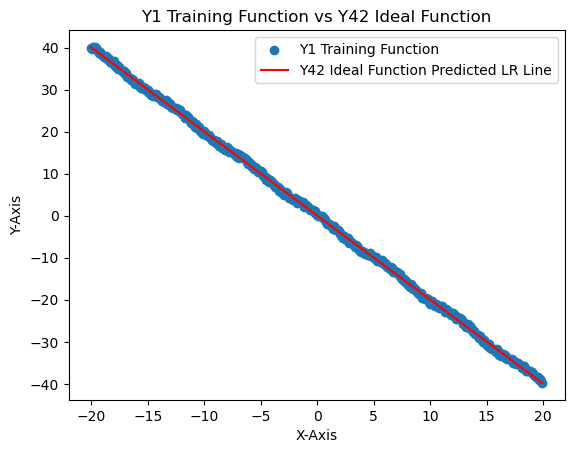

In [27]:
ideal_lrm.train_Y1_vs_ideal_Y42_func()

### Y2 Training Function vs Y41 Predicted Ideal Function:

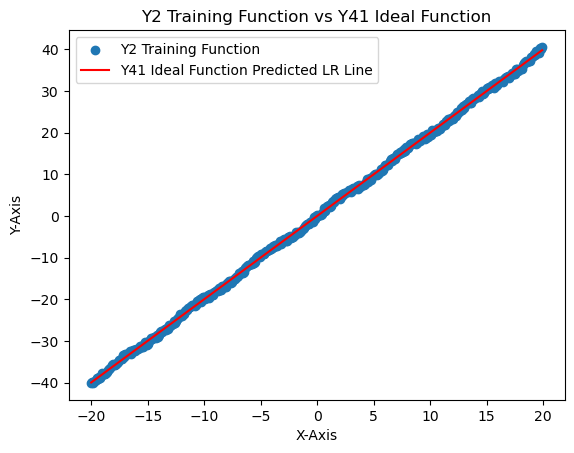

In [28]:
ideal_lrm.train_Y2_vs_ideal_Y41_func()

### Y3 Training Function vs Y11 Predicted Ideal Function:

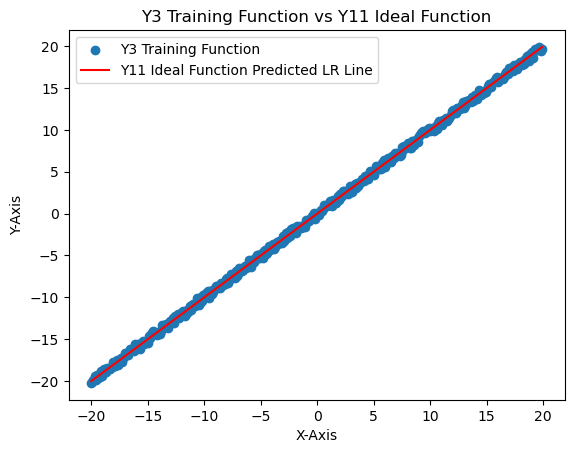

In [29]:
ideal_lrm.train_Y3_vs_ideal_Y11_func()

### Y4 Training Function vs Y48 Predicted Ideal Function:

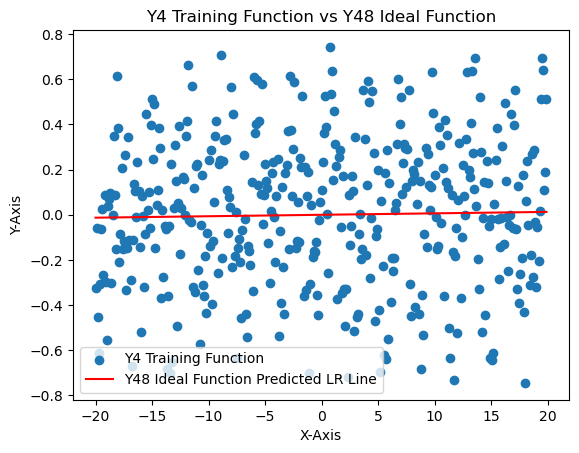

In [30]:
ideal_lrm.train_Y4_vs_ideal_Y48_func()

# Mapping of Test Data:

In [31]:
class TestDataMapping:

    # Init Constructor and Pulling in Least Squares Method Error Table and Final 4 Ideal Function Table from Ideal_Functions Class.
    def __init__(self, filename):
        
        self.csv_reader = csv.DictReader(filename)
        self.org_error_table_func = pd.DataFrame(ideal_lrm.org_error_table())
        self.final_4_ideal_pred_2nd_usage = pd.DataFrame(ideal_lrm.final4_ideal_funcs())
        display(self.final_4_ideal_pred_2nd_usage)
        
        
    # Method to Import Test Dataset Line by Line    
    def import_test_data(self, filename):
        
        with open(filename, 'r') as csv_file:
            
            csv_reader = csv.DictReader(csv_file)    
            data = [row for row in csv_reader]
            new_test_data = []
            
            for row in data:
                row = {'x' if k == 'ï»¿x' else k: v for k, v in row.items()}
                row['x'] = float(row.get('x'))
                row['y'] = float(row.get('y'))
                new_test_data.append(row)
                
            self.df_new_test_data = pd.DataFrame(new_test_data)
        
        display(self.df_new_test_data)
        return self.df_new_test_data
    
    
    # Find Error (Delta Y-Deviation) Between Train Dataset and Respective Chosen Ideal Functions Original Dataset Values: 
    def max_org_error_values(self):
        
        print("Original Error (Deviation) Table Description Before Applying Absolute Values Function (Based on Original Values from Both Train and Ideal Dataset)")
        print(self.org_error_table_func.describe())
        print("==========================================================================================================")
        print("==========================================================================================================")
        print("Original Error (Deviation) Table Description After Applying Absolute Values Function (Based on Original Values from Both Train and Ideal Dataset)")
        print(self.org_error_table_func.abs().describe())
        
        self.max_org_error_table_func_y42 = float(max(self.org_error_table_func[['y42']].abs().values))
        self.max_org_error_table_func_y41 = float(max(self.org_error_table_func[['y41']].abs().values))
        self.max_org_error_table_func_y11 = float(max(self.org_error_table_func[['y11']].abs().values))
        self.max_org_error_table_func_y48 = float(max(self.org_error_table_func[['y48']].abs().values))
        
        print("==========================================================================================================")
        print("==========================================================================================================")
        print("Hence Using Error Table with Absolute Value Function Applied to the Table to find Absolute Max Deviation:")
        print("==========================================================================================================")
        print("Max Deviation Value between y1 from Train Dataset and y42 Ideal Function Orginal Dataset Value is:", format(self.max_org_error_table_func_y42))
        print("Max Deviation Value between y2 from Train Dataset and y41 Ideal Function Orginal Dataset Value is:", format(self.max_org_error_table_func_y41))
        print("Max Deviation Value between y3 from Train Dataset and y11 Ideal Function Orginal Dataset Value is:", format(self.max_org_error_table_func_y11))
        print("Max Deviation Value between y4 from Train Dataset and y48 Ideal Function Orginal Dataset Value is:", format(self.max_org_error_table_func_y48))
        
    
    '''Find Total Max Error (Deviation) Threshhold Value for Mapping by Multiplying Max Error Values from the 4 Ideal Funcs by 
    Factor of sqrt(2). These values will be used as the final mapping criteria values for the four respective ideal functions:'''
    def max_threshhold_error_values(self):
        
        self.threshhold_org_error_table_func_y42 = self.max_org_error_table_func_y42 * sqrt(2)
        self.threshhold_org_error_table_func_y41 = self.max_org_error_table_func_y41 * sqrt(2)
        self.threshhold_org_error_table_func_y11 = self.max_org_error_table_func_y11 * sqrt(2)
        self.threshhold_org_error_table_func_y48 = self.max_org_error_table_func_y48 * sqrt(2)
        
        print("==========================================================================================================")
        print("==========================================================================================================")
        print("Hence Using Error (Deviation) Table with Absolute Value Function Applied to the Table to find Absolute Max Deviation:")
        print("==========================================================================================================")
        print("Max Deviation Value Threshhold between y1 from Train Dataset and y42 Ideal Function Orginal Dataset Value is:", format(self.threshhold_org_error_table_func_y42))
        print("Max Deviation Value Threshhold between y2 from Train Dataset and y41 Ideal Function Orginal Dataset Value is:", format(self.threshhold_org_error_table_func_y41))
        print("Max Deviation Value Threshhold between y3 from Train Dataset and y11 Ideal Function Orginal Dataset Value is:", format(self.threshhold_org_error_table_func_y11))
        print("Max Deviation Value Threshhold between y4 from Train Dataset and y48 Ideal Function Orginal Dataset Value is:", format(self.threshhold_org_error_table_func_y48))
    
    
    '''Method to find the Delta Y-Deviations of the test Dataset from the four Predicted Ideal functions to be used that will 
    be compared against the'''
    def test_data_deviation(self):
        
        self.df_new_test_data = self.df_new_test_data.sort_values(by = 'x')
        self.df_new_test_data = self.df_new_test_data.drop_duplicates(subset=["x"], keep=False)
        self.df_new_test_data = self.df_new_test_data.reset_index(drop = "True")
        
        self.x_test_list = list(self.df_new_test_data["x"])
        self.x_test_list.sort()
        
        self.final_4_ideal_pred_2nd_usage = self.final_4_ideal_pred_2nd_usage.sort_values(by = 'x')    
        self.final_4_ideal_pred_2nd_usage = self.final_4_ideal_pred_2nd_usage[self.final_4_ideal_pred_2nd_usage['x'].isin(self.x_test_list)]
        self.final_4_ideal_pred_2nd_usage = self.final_4_ideal_pred_2nd_usage.reset_index(drop = "True")
        
        
        # Find Y-Deviations of Test Data Set from Selected Four Ideal Prediction Functions:
        self.testData_y_dev = self.final_4_ideal_pred_2nd_usage.iloc[:,1:].sub(self.df_new_test_data['y'], axis = 0)
        self.testData_y_dev = pd.concat([self.df_new_test_data['x'], self.df_new_test_data['y'], self.testData_y_dev], axis=1,
                                        join='inner')

        display(self.testData_y_dev.head(50))
        display(self.testData_y_dev.tail(50))
        
        return self.testData_y_dev
 

    '''Method to set in place the DataFrame set to contain the final test datapoints, delta-y deviations and the funcs that 
    they are mapped to.'''
    def map_df_structure(self):
        
        #y_testDev["Index Column"] = y_testDev.index
        self.testData_y_dev = self.testData_y_dev[["x", "y", "y42", "y41", "y11", "y48"]]

        self.dict_y_testDev = self.testData_y_dev.to_dict('index')

        self.df_test_map = pd.DataFrame(columns=["Index Column", "X (test func)", "Y (test func)", "Delta Y (test func)", "No. of ideal func"])
        self.df_test_map["X (test func)"] = self.testData_y_dev["x"]
        self.df_test_map["Y (test func)"] = self.testData_y_dev["y"]
        self.df_test_map["Index Column"] = self.df_test_map.index
          
        display(self.df_test_map.head())
        
    
    # Filtering of Predicted Values from Ideal Prediction Function for Ideal Function y11:
    def filtering_y11(self):
        
        self.dict_y_testDev = self.testData_y_dev.to_dict('dict')
        self.y11_dict = self.dict_y_testDev['y11']
       
        def filter_y11(key_value):
            
            self.key, self.value = key_value
            
            if self.value < self.threshhold_org_error_table_func_y11 and self.value > -self.threshhold_org_error_table_func_y11:
                return True  #Retain the selected pair value for the filtered dictionary if they meet the Y11 mapping criteria.
            else:
                return False  #Filter out the the pair value that does not meet the Y11 mapping criteria   
        
        self.y11_filter_values = dict(filter(filter_y11, self.y11_dict.items()))
        print(self.y11_filter_values)
        
        '''New Dictionary For Mapping Selected Ideal Function to Relevant Data Points that have beem selected for Mapping Based 
        on Selection Criteria:'''
        self.ideal_func_keys_dict_y11 = list(self.y11_filter_values.keys())
        self.ideal_func_name_dict_y11 = []
        
        for i in range(len(self.ideal_func_keys_dict_y11)):
            
            self.ideal_func_name_dict_y11.append("y11")

        self.ideal_func_dict_y11 = dict(zip(self.ideal_func_keys_dict_y11, self.ideal_func_name_dict_y11))
        return self.y11_filter_values, self.ideal_func_dict_y11
    
    
    # Filtering of Predicted Values from Ideal Prediction Function for Ideal Function y41:
    def filtering_y41(self):
        
        self.dict_y_testDev = self.testData_y_dev.to_dict('dict')
        self.y41_dict = self.dict_y_testDev['y41']

        def filter_y41(key_value):
            self.key, self.value = key_value
            
            if self.value < self.threshhold_org_error_table_func_y41 and self.value > -self.threshhold_org_error_table_func_y41:
                return True  #Retain the selected pair value for the filtered dictionary if they meet the Y41 mapping criteria.
            else:
                return False  #Filter out the the pair value that does not meet the Y41 mapping criteria 
        
        self.y41_filter_values = dict(filter(filter_y41, self.y41_dict.items()))
        print(self.y41_filter_values)
        
        '''New Dictionary For Mapping Selected Ideal Function to Relevant Data Points that have beem selected for Mapping Based 
        on Selection Criteria:'''
        self.ideal_func_keys_dict_y41 = list(self.y41_filter_values.keys())
        self.ideal_func_name_dict_y41 = []
        
        for i in range(len(self.ideal_func_keys_dict_y41)):
            
            self.ideal_func_name_dict_y41.append("y41")

        self.ideal_func_dict_y41 = dict(zip(self.ideal_func_keys_dict_y41, self.ideal_func_name_dict_y41))      
        return self.y41_filter_values, self.ideal_func_dict_y41
        
    
    # Filtering of Predicted Values from Ideal Prediction Function for Ideal Function y42:
    def filtering_y42(self):
        
        self.dict_y_testDev = self.testData_y_dev.to_dict('dict')
        self.y42_dict = self.dict_y_testDev['y42']

        def filter_y42(key_value):
            self.key, self.value = key_value
            
            if self.value < self.threshhold_org_error_table_func_y42 and self.value > -self.threshhold_org_error_table_func_y42:
                return True  #Retain the selected pair value for the filtered dictionary if they meet the Y42 mapping criteria
            else:
                return False  #Filter out the the pair value that does not meet the Y42 mapping criteria 
        
        self.y42_filter_values = dict(filter(filter_y42, self.y42_dict.items()))
        print(self.y42_filter_values)

        '''New Dictionary For Mapping Selected Ideal Function to Relevant Data Points that have beem selected for Mapping Based 
        on Selection Criteria:'''
        self.ideal_func_keys_dict_y42 = list(self.y42_filter_values.keys())
        self.ideal_func_name_dict_y42 = []
        
        for i in range(len(self.ideal_func_keys_dict_y42)):
            
            self.ideal_func_name_dict_y42.append("y42")

        self.ideal_func_dict_y42 = dict(zip(self.ideal_func_keys_dict_y42, self.ideal_func_name_dict_y42))
        return self.y42_filter_values, self.ideal_func_dict_y42
    
    
    # Filtering of Predicted Values from Ideal Prediction Function for Ideal Function y48:
    def filtering_y48(self):
        
        self.dict_y_testDev = self.testData_y_dev.to_dict('dict')
        self.y48_dict = self.dict_y_testDev['y48']

        def filter_y48(key_value):
            self.key, self.value = key_value
            
            if self.value < self.threshhold_org_error_table_func_y48 and self.value > -self.threshhold_org_error_table_func_y48:
                return True  #Retain the selected pair value for the filtered dictionary if they meet the Y48 mapping criteria
            else:
                return False  #Filter out the the pair value that does not meet the Y48 mapping criteria 
        
        self.y48_filter_values = dict(filter(filter_y48, self.y48_dict.items()))
        print(self.y48_filter_values)
        
        # New Dictionary For Mapping Selected Ideal Function to Relevant Data Points that have beem selected for Mapping Based on Selection Criteria:
        self.ideal_func_keys_dict_y48 = list(self.y48_filter_values.keys())
        self.ideal_func_name_dict_y48 = []
        
        for i in range(len(self.ideal_func_keys_dict_y48)):
            
            self.ideal_func_name_dict_y48.append("y48")

        self.ideal_func_dict_y48 = dict(zip(self.ideal_func_keys_dict_y48, self.ideal_func_name_dict_y48))
        return self.y48_filter_values, self.ideal_func_dict_y48
    
    
    # Final Mapped DataFrame Showing Selected X and Y Test Values Along with their Deviations and The Their Selected Ideal Functions Based on the Selection Criteria:
    def final_mapped_DataFrame(self):
        
        #Creating Final Data Point Deviation's Dictionary for Mapping:
        self.y_final_map_dict = self.y11_filter_values.copy()
        self.y_final_map_dict.update(self.y41_filter_values)
        self.y_final_map_dict.update(self.y42_filter_values)
        self.y_final_map_dict.update(self.y48_filter_values)
        
        #Creating Final Data Point Selected Ideal Function Dictionary for Mapping:
        self.ideal_func_dict = self.ideal_func_dict_y11.copy()
        self.ideal_func_dict.update(self.ideal_func_dict_y41)
        self.ideal_func_dict.update(self.ideal_func_dict_y42)
        self.ideal_func_dict.update(self.ideal_func_dict_y48)

        self.df_test_map['Delta Y (test func)'] = self.df_test_map["Index Column"].map(self.y_final_map_dict)
        self.df_test_map['No. of ideal func'] = self.df_test_map["Index Column"].map(self.ideal_func_dict)
        self.df_test_map = self.df_test_map.dropna(subset=["Delta Y (test func)"])
        self.df_test_map = self.df_test_map[["X (test func)", "Y (test func)", "Delta Y (test func)", "No. of ideal func"]]
        self.df_test_map.head(50)
        display(self.df_test_map.head(50))
        
        return self.df_test_map
    
    
    '''Method to create the combined Line Graph and Scatter Plot Graph showing the final four ideal functions along with the test 
    data points that were mapped to the four ideal functions.'''
    def test_data_mapping_graph(self):
        
        # Sort the Final Test Map Dataframe by its X column in ascending order:
        self.sorted_final_mapped_Test_DataFrame = self.df_test_map.sort_values(by='X (test func)')

        '''Assign X and Y Test Values to the Values. Assign the Mapped Ideal Function number for the points as labels for the 
        data points'''
        self.x_test_axis = self.sorted_final_mapped_Test_DataFrame["X (test func)"]
        self.y_test_axis = self.sorted_final_mapped_Test_DataFrame["Y (test func)"]
        self.data_pts_label = self.sorted_final_mapped_Test_DataFrame["No. of ideal func"]

        # Sort the Test X and Y values as lists. 
        self.x_test_axis_list = list(self.x_test_axis)
        self.y_test_axis_list = list(self.y_test_axis)
        self.data_pts_label_list = list(self.data_pts_label)
    

        '''Selected only rows from the Tables with the predicted values of the Ideal Function Linear Equations if the X values 
        from the Predicted Ideal Functions exists in the Test X value columns.'''
        self.final4_ideal_funcs_mapped = final4_ideal_funcs[final4_ideal_funcs["x"].isin(self.x_test_axis_list)]
        self.sorted_final4_ideal_funcs_mapped = self.final4_ideal_funcs_mapped.sort_values(by = 'x')

        # Assign the Predicted Ideal Function Column Values to the Axis Variables to be used in the Graph Below.
        self.y42_axis = self.final4_ideal_funcs_mapped["y42"]
        self.y41_axis = self.final4_ideal_funcs_mapped["y41"]
        self.y11_axis = self.final4_ideal_funcs_mapped["y11"]
        self.y48_axis = self.final4_ideal_funcs_mapped["y48"]

        # Title of the Final Graph Below 
        plt.title("X (test func) vs Y (test func) values Mapped to their Selected Ideal Functions") 
  
        # Scatter plot showing X_test vs Y_test 
        plt.scatter(self.x_test_axis, self.y_test_axis, label = "X_test vs Y_Test Data Points")
  
        # Line plots showing the four ideal functions Linear Equation Prediction Functions. 
        plt.plot(self.x_test_axis, self.y42_axis, label = "Y42 Predicted LR Line", color = "red")
        plt.plot(self.x_test_axis, self.y41_axis, label = "Y41 Predicted LR Line", color = "green")
        plt.plot(self.x_test_axis, self.y11_axis, label = "Y11 Predicted LR Line", color = "blue")
        plt.plot(self.x_test_axis, self.y48_axis, label = "Y48 Predicted LR Line", color = "orange")
        plt.legend()

        # Labelling all X-test vs T-Yest Data Point from Test Dataset with Number of Ideal Function they are assigned to:
        for self.i, self.text in enumerate(self.data_pts_label):
            plt.annotate(self.text, (self.x_test_axis_list[self.i], self.y_test_axis_list[self.i]))

        # Labelling of the X and Y Axis
        plt.ylabel("Y-Axis")
        plt.xlabel("X-Axis")

        # Adjusting the size of the Graphs:
        graph = plt.figure() 
        graph.set_figwidth(50)
        graph.set_figheight(50)

## Find Error (Deviation) Between Train Dataset and Respective Chosen Ideal Functions Original Dataset Values: 

In [32]:
test_data_mapping = TestDataMapping('test.csv')


,x,y42,y41,y11,y48
0,-20.0,0.245588,0.104544,0.214268,0.311670
1,-19.9,0.219341,0.009818,0.170950,0.045640
2,-19.8,-0.474923,0.444527,0.106782,0.438714
3,-19.7,-0.726960,0.143948,-0.310882,0.598992
4,-19.6,-0.571529,0.185476,0.215890,0.293088


The final four Ideal Functions selected are the following: 
Training Column y1, Ideal Function:  y42
Training Column y2, Ideal Function:  y41
Training Column y3, Ideal Function:  y11
Training Column y4, Ideal Function:  y48
----------------------------------------------------------
----------------------------------------------------------
Table Showing The Predictions Of The Four Ideal Functions:


,x,y42,y41,y11,y48
0,-20.0,40.024160,-39.974046,-20.0,-0.013244
1,-19.9,39.824154,-39.774182,-19.9,-0.013180
2,-19.8,39.624147,-39.574318,-19.8,-0.013116
3,-19.7,39.424140,-39.374454,-19.7,-0.013052
4,-19.6,39.224133,-39.174589,-19.6,-0.012988
...,...,...,...,...,...
395,19.5,-38.978524,38.972307,19.5,0.012056
396,19.6,-39.178531,39.172171,19.6,0.012121
397,19.7,-39.378538,39.372035,19.7,0.012185
398,19.8,-39.578545,39.571900,19.8,0.012249


,x,y42,y41,y11,y48
0,-20.0,40.024160,-39.974046,-20.0,-0.013244
1,-19.9,39.824154,-39.774182,-19.9,-0.013180
2,-19.8,39.624147,-39.574318,-19.8,-0.013116
3,-19.7,39.424140,-39.374454,-19.7,-0.013052
4,-19.6,39.224133,-39.174589,-19.6,-0.012988
...,...,...,...,...,...
395,19.5,-38.978524,38.972307,19.5,0.012056
396,19.6,-39.178531,39.172171,19.6,0.012121
397,19.7,-39.378538,39.372035,19.7,0.012185
398,19.8,-39.578545,39.571900,19.8,0.012249


## Import Test Dataset by using the Line By Line Approach:

In [33]:
df_final_test_data = pd.DataFrame(test_data_mapping.import_test_data('test.csv'))

,x,y
0,17.5,34.161040
1,0.3,1.215102
2,-8.7,-16.843908
3,-19.2,-37.170870
4,-11.0,-20.263054
...,...,...
95,-1.9,-4.036904
96,12.2,-0.010358
97,16.5,-33.964134
98,5.3,-10.291622


## Actual calculated Deviation between Train Dataset Functions and Their Selected Ideal Dataset Functions.

In [34]:
max_org_error_values = test_data_mapping.max_org_error_values()

Original Error (Deviation) Table Description Before Applying Absolute Values Function (Based on Original Values from Both Train and Ideal Dataset)
               x         y42         y41         y11         y48
count  400.00000  400.000000  400.000000  400.000000  400.000000
mean    -0.05000    0.015138   -0.006902    0.001628   -0.013099
std     11.56143    0.467938    0.464636    0.273567    0.326783
min    -20.00000   -0.960700   -0.954824   -0.495514   -0.742475
25%    -10.02500   -0.355070   -0.376906   -0.239214   -0.237157
50%     -0.05000   -0.003512    0.012032   -0.000500   -0.032354
75%      9.92500    0.378241    0.347808    0.232456    0.203540
max     19.90000    0.971858    0.971673    0.498936    0.755606
Original Error (Deviation) Table Description After Applying Absolute Values Function (Based on Original Values from Both Train and Ideal Dataset)
                  x         y42         y41         y11         y48
count  4.000000e+02  400.000000  400.000000  400.00000

## Find Total Error (Deviation) Threshhold Value to be used as the criteria values for Mapping by Multiplying the Highest Error (Deviation) values from each of the four ideal functions by Factor of sqrt(2):

In [35]:
max_threshhold_testing_error_values = test_data_mapping.max_threshhold_error_values()

Hence Using Error (Deviation) Table with Absolute Value Function Applied to the Table to find Absolute Max Deviation:
Max Deviation Value Threshhold between y1 from Train Dataset and y42 Ideal Function Orginal Dataset Value is: 1.374415150406892
Max Deviation Value Threshhold between y2 from Train Dataset and y41 Ideal Function Orginal Dataset Value is: 1.374152829365564
Max Deviation Value Threshhold between y3 from Train Dataset and y11 Ideal Function Orginal Dataset Value is: 0.7056020579561934
Max Deviation Value Threshhold between y4 from Train Dataset and y48 Ideal Function Orginal Dataset Value is: 1.0685881434164866


## Y-Deviations of Test Data Set from Selected Four Ideal Functions:

In [36]:
y_testDev = test_data_mapping.test_data_deviation()

,x,y,y42,y41,y11,y48
0,-2.000000e+01,-19.284970,59.309130,-20.689076,-0.715030,19.271726
1,-1.980000e+01,-19.915014,59.539161,-19.659304,0.115014,19.901898
2,-1.930000e+01,-38.458572,77.082685,-0.116425,19.158572,38.445776
3,-1.920000e+01,-37.170870,75.594976,-1.204263,17.970870,37.158138
4,-1.910000e+01,-38.155376,76.379475,-0.019892,19.055376,38.142708
5,-1.880000e+01,13.410461,24.213618,-50.986137,-32.210461,-13.422936
6,-1.830000e+01,-19.014248,55.638293,-17.562107,0.714248,19.002093
7,-1.790000e+01,1.169216,34.654802,-36.946114,-19.069216,-1.181115
8,-1.680000e+01,-34.480774,68.104717,0.902382,17.680774,34.469580
9,-1.540000e+01,29.490164,1.333684,-60.270458,-44.890164,-29.500462


,x,y,y42,y41,y11,y48
29,-5.700000e+00,2.449291,8.973898,-13.842758,-8.149291,-2.453375
30,-5.300000e+00,-4.372293,14.995454,-6.221718,-0.927707,4.368464
31,-4.500000e+00,-9.886850,18.909957,0.891753,5.386850,9.883534
32,-4.000000e+00,-8.339117,16.362190,0.343341,4.339117,8.336121
33,-3.200000e+00,7.252328,-0.829310,-13.649191,-10.452328,-7.254812
34,-3.100000e+00,-2.770136,8.993148,-3.426863,-0.329864,2.767717
35,-1.900000e+00,-4.036904,7.859835,0.238276,2.136904,4.035254
36,-1.300000e+00,17.948320,-15.325431,-20.547763,-19.248320,-17.949586
37,-1.000000e+00,38.057026,-36.034157,-40.056877,-39.057026,-38.058100
38,2.840000e-13,1.026143,-1.003341,-1.027352,-1.026143,-1.026576


# Final Test Data Mapping - Based on Criteria in assignment:

## Setting up of Final DataFrame to be used for Mapping:

In [37]:
mapping_df_structure = test_data_mapping.map_df_structure()

,Index Column,X (test func),Y (test func),Delta Y (test func),No. of ideal func
0,0,-20.0,-19.284970,NaN,NaN
1,1,-19.8,-19.915014,NaN,NaN
2,2,-19.3,-38.458572,NaN,NaN
3,3,-19.2,-37.170870,NaN,NaN
4,4,-19.1,-38.155376,NaN,NaN


## Filtered Values of Prediction Ideal Function "y11" (Dictionary Format) - Based on Mapping Criteria for the assignment:

In [38]:
y11_filtered_values = test_data_mapping.filtering_y11()

{1: 0.11501400000000928, 23: 0.15225100000000502, 34: -0.3298640999999982, 40: -0.6264555000000005, 48: 0.4671929999999964, 55: -0.01037700000000541, 67: -0.5633940000000095, 74: -0.33515200000001144, 77: -0.2932450000000131}


## Filtered Values of Prediction Ideal Function "y41" (Dictionary Format) - Based on Mapping Criteria for the assignment:

In [39]:
y41_filtered_values = test_data_mapping.filtering_y41()

{2: -0.11642478373157417, 3: -1.2042625988030906, 4: -0.019892413874629256, 8: 0.90238183948032, 25: -0.5454851813131505, 31: 0.8917525856828323, 32: 0.3433405103252092, 35: 0.23827569382319913, 38: -1.0273516925351946, 39: -0.6167189377503351, 40: 0.1712488868920432, 47: -0.8823959420417911, 54: -0.48435441475971786, 58: 1.2551140235236993, 59: -0.5673094970484911, 61: -0.7777857573345912, 71: 0.8139832699474923, 76: 0.04985767401767305, 78: 0.4167623383739567}


## Filtered Values of Prediction Ideal Function "y42" (Dictionary Format) - Based on Mapping Criteria for the assignment:

In [40]:
y42_filtered_values = test_data_mapping.filtering_y42()

{9: 1.333683805506766, 13: -0.6516952936533897, 15: -0.9828098693127352, 20: 1.0440567932775124, 21: 1.2397614037092204, 24: 1.0516542350043494, 33: -0.8293097702704344, 38: -1.0033414589994483, 44: -1.2724124990460197, 45: -0.2859370747053678, 50: 0.48170862265724423, 68: 0.9858137147450705, 69: 0.23702291822230137, 70: 0.7486449356084819, 72: -0.07305504700534016}


## Filtered Values of Prediction Ideal Function "y48" (Dictionary Format) - Based on Mapping Criteria for the assignment:

In [41]:
y48_filtered_values = test_data_mapping.filtering_y48()

{14: -0.6787679111600449, 26: 0.21250650134089116, 38: -1.0265762696938905, 42: 0.24444632067264788, 43: 0.8425632708559172, 51: 0.731254207381289, 57: 0.017738890796699394, 63: 0.07503969201662251, 64: -0.3014103859711595, 65: 0.6864269240899302, 66: 0.28481900610214816, 75: -0.8207280434091337}


## # Final Mapped DataFrame Showing Selected X and Y Test Values Along with their Deviations and The Their Selected Ideal Functions Based on the Selection Criteria:

In [42]:
final_mapped_Test_DataFrame = test_data_mapping.final_mapped_DataFrame()

,X (test func),Y (test func),Delta Y (test func),No. of ideal func
1,-1.980000e+01,-19.915014,0.115014,y11
2,-1.930000e+01,-38.458572,-0.116425,y41
3,-1.920000e+01,-37.170870,-1.204263,y41
4,-1.910000e+01,-38.155376,-0.019892,y41
8,-1.680000e+01,-34.480774,0.902382,y41
9,-1.540000e+01,29.490164,1.333684,y42
13,-1.250000e+01,25.675346,-0.651695,y42
14,-1.200000e+01,0.670648,-0.678768,y48
15,-1.180000e+01,24.606413,-0.982810,y42
20,-1.000000e+01,18.979424,1.044057,y42


## Graphing Showing the Final Four Predicted Ideal Functions alog with the Test Data points that have been mapped to them

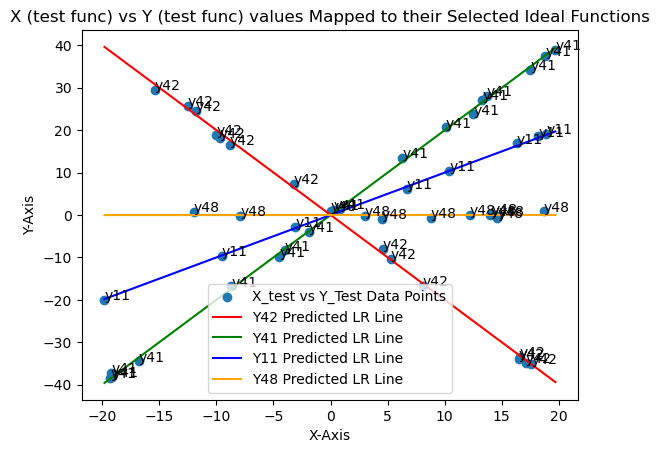

<Figure size 5000x5000 with 0 Axes>

In [43]:
test_dataset_mapping_graph = test_data_mapping.test_data_mapping_graph()

# Create Database and Tables:

In [44]:
class create_database:
    
    def __init__(self):
        
        self.db = db
        
        # Create Database and connection for Database:
        self.engine = self.db.create_engine('sqlite:///final_practical_assignment.db')
        
        # Create Connection for Database Concerned:
        self.conn = self.engine.connect()
        
        # Obtain Metadata Object:
        self.meta_data = self.db.MetaData()
        
        return 
    
    # Create Table for Train_Data Using SQLAlchemy:
    def create_train_table(self, filename):
        
        try:
            with self.conn:
                train_data = self.db.Table(
                    'Train_data', self.meta_data,
                    self.db.Column('X', db.Float()),
                    self.db.Column('Y1 (training func)', db.Float()),
                    self.db.Column('Y2 (training func)', db.Float()),
                    self.db.Column('Y3 (training func)', db.Float()),
                    self.db.Column('Y4 (training func)', db.Float()))
                
                # Meta_Data Create All:
                self.meta_data.create_all(self.engine)
                
                # Pull Training Data into created Dataframe:
                self.data = pd.read_csv(filename)
                
                df_data_train = self.data
                df_data_train.rename(columns={"x":"X"}, inplace = True)
                df_data_train.rename(columns={"y1":"Y1 (training func)"}, inplace = True)
                df_data_train.rename(columns={"y2":"Y2 (training func)"}, inplace = True)
                df_data_train.rename(columns={"y3":"Y3 (training func)"}, inplace = True)
                df_data_train.rename(columns={"y4":"Y4 (training func)"}, inplace = True)
                
                # Move DataFrame Data into a Dictionary:
                df_data_train_dict = df_data_train.to_dict('records')
                
                # Insert Data into Train_Data Table inside Database:
                insert_train = self.conn.execute(train_data.insert(), df_data_train_dict)
                table_train = db.Table("Train_data", self.meta_data, autoload_with = self.engine)             
                
                # Query data from table_train data in SQLAlchemy Database:
                query_train = db.select([table_train])
                result_train = self.conn.execute(query_train)
                result_train_set = result_train.fetchall()
                print(result_train_set)                
                print(len(result_train_set))
                
                df_train_columns =  pd.read_sql_query('SELECT * FROM Train_data', self.conn)
                display(df_train_columns.columns)

                df_result_train_set = pd.DataFrame(result_train_set)
                df_result_train_set.to_csv('Final Training Data.csv', index=False)
                
                # Delete Data from Table:
                delete_train = train_data.delete()
                
                # Execute Delection from Train Data:
                deleted_train = self.conn.execute(delete_train)
                
                #Query from Train Data - Check For Deletion:
                table_train = db.Table("Train_data", self.meta_data, autoload_with = self.engine) 
                query_train = db.select([table_train]) 
                result_train = self.conn.execute(query_train) 
                result_train_set = result_train.fetchall() 
                print(result_train_set)   
    
        
        except sqlite3.Error as e:
            raise Exception(f"Database error: {e}")
            
            
    # Create Table for Ideal_Data Using SQLAlchemy:
    def create_ideal_table(self, filename):
        
        self.conn = self.engine.connect()
        
        try:
            with self.conn:
                ideal_data = self.db.Table(
                    'Ideal_data', self.meta_data,
                    self.db.Column('X', db.Float()), self.db.Column('Y1 (ideal func)', db.Float()), 
                    self.db.Column('Y2 (ideal func)', db.Float()),self.db.Column('Y3 (ideal func)', db.Float()), 
                    self.db.Column('Y4 (ideal func)', db.Float()), self.db.Column('Y5 (ideal func)', db.Float()),
                    self.db.Column('Y6 (ideal func)', db.Float()), self.db.Column('Y7 (ideal func)', db.Float()), 
                    self.db.Column('Y8 (ideal func)', db.Float()), self.db.Column('Y9 (ideal func)', db.Float()), 
                    self.db.Column('Y10 (ideal func)', db.Float()), self.db.Column('Y11 (ideal func)', db.Float()),
                    self.db.Column('Y12 (ideal func)', db.Float()), self.db.Column('Y13 (ideal func)', db.Float()), 
                    self.db.Column('Y14 (ideal func)', db.Float()), self.db.Column('Y15 (ideal func)', db.Float()), 
                    self.db.Column('Y16 (ideal func)', db.Float()), self.db.Column('Y17 (ideal func)', db.Float()),
                    self.db.Column('Y18 (ideal func)', db.Float()), self.db.Column('Y19 (ideal func)', db.Float()), 
                    self.db.Column('Y20 (ideal func)', db.Float()), self.db.Column('Y21 (ideal func)', db.Float()), 
                    self.db.Column('Y22 (ideal func)', db.Float()), self.db.Column('Y23 (ideal func)', db.Float()), 
                    self.db.Column('Y24 (ideal func)', db.Float()), self.db.Column('Y25 (ideal func)', db.Float()), 
                    self.db.Column('Y26 (ideal func)', db.Float()), self.db.Column('Y27 (ideal func)', db.Float()), 
                    self.db.Column('Y28 (ideal func)', db.Float()), self.db.Column('Y29 (ideal func)', db.Float()),
                    self.db.Column('Y30 (ideal func)', db.Float()), self.db.Column('Y31 (ideal func)', db.Float()), 
                    self.db.Column('Y32 (ideal func)', db.Float()), self.db.Column('Y33 (ideal func)', db.Float()), 
                    self.db.Column('Y34 (ideal func)', db.Float()), self.db.Column('Y35 (ideal func)', db.Float()), 
                    self.db.Column('Y36 (ideal func)', db.Float()), self.db.Column('Y37 (ideal func)', db.Float()), 
                    self.db.Column('Y38 (ideal func)', db.Float()), self.db.Column('Y39 (ideal func)', db.Float()), 
                    self.db.Column('Y40 (ideal func)', db.Float()), self.db.Column('Y41 (ideal func)', db.Float()),
                    self.db.Column('Y42 (ideal func)', db.Float()), self.db.Column('Y43 (ideal func)', db.Float()), 
                    self.db.Column('Y44 (ideal func)', db.Float()), self.db.Column('Y45 (ideal func)', db.Float()), 
                    self.db.Column('Y46 (ideal func)', db.Float()), self.db.Column('Y47 (ideal func)', db.Float()),
                    self.db.Column('Y48 (ideal func)', db.Float()), self.db.Column('Y49 (ideal func)', db.Float()), 
                    self.db.Column('Y50 (ideal func)', db.Float()))
                
                # Meta_Data Create All:
                self.meta_data.create_all(self.engine)
                
                # Pull Training Data into created Dataframe:
                self.data = pd.read_csv(filename)
                
                df_data_ideal = self.data
                df_data_ideal.rename(columns={"x":"X"}, inplace = True)
                df_data_ideal.rename(columns={"y1":"Y1 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y2":"Y2 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y3":"Y3 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y4":"Y4 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y5":"Y5 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y6":"Y6 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y7":"Y7 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y8":"Y8 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y9":"Y9 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y10":"Y10 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y11":"Y11 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y12":"Y12 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y13":"Y13 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y14":"Y14 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y15":"Y15 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y16":"Y16 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y17":"Y17 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y18":"Y18 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y19":"Y19 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y20":"Y20 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y21":"Y21 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y22":"Y22 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y23":"Y23 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y24":"Y24 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y25":"Y25 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y26":"Y26 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y27":"Y27 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y28":"Y28 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y29":"Y29 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y30":"Y30 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y31":"Y31 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y32":"Y32 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y33":"Y33 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y34":"Y34 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y35":"Y35 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y36":"Y36 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y37":"Y37 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y38":"Y38 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y39":"Y39 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y40":"Y40 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y41":"Y41 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y42":"Y42 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y43":"Y43 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y44":"Y44 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y45":"Y45 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y46":"Y46 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y47":"Y47 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y48":"Y48 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y49":"Y49 (ideal func)"}, inplace = True)
                df_data_ideal.rename(columns={"y50":"Y50 (ideal func)"}, inplace = True)
                
                
                # Move DataFrame Data into a Dictionary:
                df_data_ideal_dict = df_data_ideal.to_dict('records')
                
                # Insert Data into Ideal_Data Table inside Database:
                insert_ideal = self.conn.execute(ideal_data.insert(), df_data_ideal_dict)

                ideal_train = db.Table("Ideal_data", self.meta_data, autoload_with = self.engine)
                
                # Query data from table_ideal data in SQLAlchemy Database:
                query_ideal = db.select([ideal_train])
                result_ideal = self.conn.execute(query_ideal)
                result_ideal_set = result_ideal.fetchall()
                print(result_ideal_set)                
                print(len(result_ideal_set))
                
                df_ideal_columns =  pd.read_sql_query('SELECT * FROM Ideal_data', self.conn)
                display(df_ideal_columns.columns)
                
                df_result_ideal_set = pd.DataFrame(result_ideal_set)
                df_result_ideal_set.to_csv('Final Ideal Data.csv', index=False)
                
                # Delete Data from Table:
                delete_ideal = ideal_data.delete()
                
                # Execute Delection from Ideal Data:
                deleted_ideal = self.conn.execute(delete_ideal)
                
                #Query from Ideal Data - Check For Deletion:
                table_ideal = db.Table("Ideal_data", self.meta_data, autoload_with = self.engine) 
                query_ideal = db.select([table_ideal]) 
                result_ideal = self.conn.execute(query_ideal) 
                result_ideal_set = result_ideal.fetchall() 
                print(result_ideal_set)                
        
        except sqlite3.Error as e:
            raise Exception(f"Database error: {e}")
            
    # Create Table for Mapped_Test_Data Using SQLAlchemy:
    def create_mapped_test_table(self, DataFrame):
        
        self.conn = self.engine.connect()
        
        try:
            with self.conn:
                mapped_test_data = self.db.Table(
                    'Mapped_Test_Data', self.meta_data,
                    self.db.Column('X (test func)', db.Float()),
                    self.db.Column('Y (test func)', db.Float()),
                    self.db.Column('Delta Y (test func)', db.Float()),
                    self.db.Column('No. of ideal func', db.String()))
                
                # Meta_Data Create All:
                self.meta_data.create_all(self.engine)
                
                # Pull Mapped Test Data into created Dataframe:
                self.data = DataFrame
                
                df_data_mapped_test = self.data
                
                # Move DataFrame Data into a Dictionary:
                df_data_mapped_test_dict = df_data_mapped_test.to_dict('records')
                
                # Insert Data into Mapped_Test_Data Table inside Database:
                insert_mapped_test = self.conn.execute(mapped_test_data.insert(), df_data_mapped_test_dict)

                table_mapped_test = db.Table("Mapped_Test_Data", self.meta_data, autoload_with = self.engine)
                
                # Query data from mapped_test_train data in SQLAlchemy Database:
                query_mapped_test = db.select([table_mapped_test])
                result_mapped_test = self.conn.execute(query_mapped_test)
                result_mapped_test_set = result_mapped_test.fetchall()
                print(result_mapped_test_set)                
                print(len(result_mapped_test_set))
                
                df_mapped_test_columns =  pd.read_sql_query('SELECT * FROM Mapped_Test_Data', self.conn)
                display(df_mapped_test_columns.columns)
                
                df_result_mapped_test_set = pd.DataFrame(result_mapped_test_set)
                df_result_mapped_test_set.to_csv('Final Mapped Testing Data.csv', index=False)
                
                # Delete Data from Table:
                delete_mapped_test = mapped_test_data.delete()
                
                # Execute Delection from Mapped Test Data:
                deleted_mapped_test = self.conn.execute(delete_mapped_test)
                
                #Query from Mapped Test Data - Check For Deletion:
                table_mapped_test = db.Table("Mapped_Test_Data", self.meta_data, autoload_with = self.engine) 
                query_mapped_test = db.select([table_mapped_test]) 
                result_mapped_test = self.conn.execute(query_mapped_test) 
                result_mapped_test_set = result_mapped_test.fetchall() 
                print(result_mapped_test_set)
                
                return result_mapped_test_set
                 
        
        except sqlite3.Error as e:
            raise Exception(f"Database error: {e}")
    
    def database_info(self):
        
        for t in self.meta_data.tables:
            print("Tables: ", t)

## Create Instance of Database Class:

In [45]:
datab = create_database()

## Create Train Data Table by Creating "create_train_table" instance:

In [46]:
train_data_db = datab.create_train_table("train.csv")

[(-20.0, 39.778572, -40.07859, -20.214268, -0.32491425), (-19.9, 39.604813, -39.784, -20.07095, -0.058819864), (-19.8, 40.09907, -40.018845, -19.906782, -0.4518296), (-19.7, 40.1511, -39.518402, -19.389118, -0.6120442), (-19.6, 39.795662, -39.360065, -19.81589, -0.3060756), (-19.5, 39.340855, -38.90581, -19.287113, -0.062154666), (-19.4, 39.25246, -39.12036, -19.683708, 0.026392838), (-19.3, 38.590164, -38.62107, -19.494537, -0.2690418), (-19.2, 38.893463, -38.806778, -19.533716, 0.08567329), (-19.1, 38.364567, -38.354656, -18.75372, -0.29954198), (-19.0, 38.13553, -37.795067, -19.363068, -0.553223), (-18.9, 37.825813, -37.984848, -18.528309, 0.040018722), (-18.8, 37.672874, -37.855568, -18.92033, 0.0705662), (-18.7, 37.99707, -37.64723, -18.858202, 0.09534555), (-18.6, 37.38134, -37.436577, -18.457552, -0.3021374), (-18.5, 37.429653, -37.083054, -18.551897, -0.001835507), (-18.4, 37.330147, -36.65041, -18.406178, 0.34796613), (-18.3, 36.635334, -36.5591, -18.573486, 0.08883932), (-18.

Index(['X', 'Y1 (training func)', 'Y2 (training func)', 'Y3 (training func)',
       'Y4 (training func)'],
      dtype='object')

[]


## Create Ideal Data Table by Creating "create_ideal_table" instance:

In [47]:
ideal_data_db = datab.create_ideal_table("ideal.csv") 

[(-20.0, -0.9129453, 0.40808207, 9.087055, 5.408082, -9.087055, 0.9129453, -0.8390715, -0.85091937, 0.81616414, 18.258905, -20.0, -58.0, -45.0, 20.0, 13.0, 400.0, -400.0, 800.0, 410.0, 289.0, -8000.0, 8000.0, 8000.0, -16000.0, -23995.0, -5832.0, 10648.0, -8020.0, -7600.0, -8795.0, 20.0, 4.472136, 20.12461, -0.7464143, 10.0, 100.0, -20.0, -1.3210273, 399.08707, 899.5919, -40.456474, 40.20404, 2.9957323, -0.008333334, 12.995732, 5.2983174, -5.2983174, -0.18627828, 0.9129453, 0.3968496), (-19.9, -0.8676441, 0.4971858, 9.132356, 5.4971857, -9.132356, 0.8676441, -0.8652126, 0.16851768, 0.9943716, 17.266117, -19.9, -57.7, -44.8, 19.9, 12.95, 396.01, -396.01, 792.02, 406.01, 285.61, -7880.599, 7880.599, 7880.599, -15761.198, -23636.797, -5735.339, 10503.459, -7900.499, -7484.589, -8667.619, 19.9, 4.460942, 20.025234, -0.6204504, 9.9, 99.5, -19.9, -1.3648299, 395.14236, 893.5128, -40.23382, 40.04859, 2.9907198, -0.008340283, 12.99072, 5.293305, -5.293305, -0.21569017, 0.8676441, 0.47695395), (

Index(['X', 'Y1 (ideal func)', 'Y2 (ideal func)', 'Y3 (ideal func)',
       'Y4 (ideal func)', 'Y5 (ideal func)', 'Y6 (ideal func)',
       'Y7 (ideal func)', 'Y8 (ideal func)', 'Y9 (ideal func)',
       'Y10 (ideal func)', 'Y11 (ideal func)', 'Y12 (ideal func)',
       'Y13 (ideal func)', 'Y14 (ideal func)', 'Y15 (ideal func)',
       'Y16 (ideal func)', 'Y17 (ideal func)', 'Y18 (ideal func)',
       'Y19 (ideal func)', 'Y20 (ideal func)', 'Y21 (ideal func)',
       'Y22 (ideal func)', 'Y23 (ideal func)', 'Y24 (ideal func)',
       'Y25 (ideal func)', 'Y26 (ideal func)', 'Y27 (ideal func)',
       'Y28 (ideal func)', 'Y29 (ideal func)', 'Y30 (ideal func)',
       'Y31 (ideal func)', 'Y32 (ideal func)', 'Y33 (ideal func)',
       'Y34 (ideal func)', 'Y35 (ideal func)', 'Y36 (ideal func)',
       'Y37 (ideal func)', 'Y38 (ideal func)', 'Y39 (ideal func)',
       'Y40 (ideal func)', 'Y41 (ideal func)', 'Y42 (ideal func)',
       'Y43 (ideal func)', 'Y44 (ideal func)', 'Y45 (ideal func)',

[]


## Create Mapped Test Data Table by Creating "create_mapped_test_table" instance:

In [48]:
mapped_test_data_db = datab.create_mapped_test_table(final_mapped_Test_DataFrame)

[(-19.8, -19.915014, 0.11501400000000928, 'y11'), (-19.3, -38.458572, -0.11642478373157417, 'y41'), (-19.2, -37.17087, -1.2042625988030906, 'y41'), (-19.1, -38.155376, -0.019892413874629256, 'y41'), (-16.8, -34.480774, 0.90238183948032, 'y41'), (-15.4, 29.490164, 1.333683805506766, 'y42'), (-12.5, 25.675346, -0.6516952936533897, 'y42'), (-12.0, 0.670648, -0.6787679111600449, 'y48'), (-11.8, 24.606413, -0.9828098693127352, 'y42'), (-10.0, 18.979424, 1.0440567932775124, 'y42'), (-9.7, 18.183699, 1.2397614037092204, 'y42'), (-9.5, -9.652251, 0.15225100000000502, 'y11'), (-8.8, 16.571745, 1.0516542350043494, 'y42'), (-8.7, -16.843908, -0.5454851813131505, 'y41'), (-7.9, -0.21800028, 0.21250650134089116, 'y48'), (-4.5, -9.88685, 0.8917525856828323, 'y41'), (-4.0, -8.339117, 0.3433405103252092, 'y41'), (-3.2, 7.2523284, -0.8293097702704344, 'y42'), (-3.1, -2.7701359, -0.3298640999999982, 'y11'), (-1.9, -4.0369043, 0.23827569382319913, 'y41'), (2.84e-13, 1.0261426, -1.0265762696938905, 'y48')

Index(['X (test func)', 'Y (test func)', 'Delta Y (test func)',
       'No. of ideal func'],
      dtype='object')

[]


## Print Database Information:

In [49]:
db_info = datab.database_info()

print(datab)
#print(db_info)

Tables:  Train_data
Tables:  Ideal_data
Tables:  Mapped_Test_Data


# Conducting Some Unittests On The Datasets Import into This Assignment:

## Class - Retrieve Dataset Inputs From "Importing_Datasets" Class Outputs for checking Dataset lengths and widths

In [50]:
class Dataset_Shape:
    
    # Initializing the dataset variable to accept the dataset output that will be called in the instances for this class.
    def __init__(self, dataset):
        
        self.dataset = dataset 

    # Method to calculate the length of the Dataset in question.
    def check_dataset_length(self):
        
        dataset_length = len(self.dataset)
        return dataset_length 
    
    # Method to calculate the width of the Dataset in question.
    def check_dataset_width(self):
        
        dataset_width = len(self.dataset.columns.to_list())
        return dataset_width
    

## Class - Contains the methods used to split all the mapped data points into their ideal function groups (Y11, y41, Y42, Y48) for ease in Unittests of the Delta Y Values used to Map the Data Points to the Four Ideal Functions

In [51]:
class check_mapped_data:
    
    '''Initializing of the variable to accept the final mapped dataset produced from the mapping process in the 
    "TestDataMapping" class'''
    def __init__(self, mapped_dataset):
        self.mapped_dataset = mapped_dataset
        
    # Method to Pull the "Delta Y (test func)" values for the Test Data Points that were mapped to Ideal Function Y11 into a list
    def mapped_data_testing_y11(self):
        
        self.y11_list = []
        self.y11_map_criteria_limit_list = []
        
        for index, row in self.mapped_dataset.iterrows():
            if row["No. of ideal func"] == "y11":
                self.y11_list.append(row["Delta Y (test func)"])
                
        return self.y11_list
    
    # Method to Pull the "Delta Y (test func)" values for the Test Data Points that were mapped to Ideal Function Y41 into a list
    def mapped_data_testing_y41(self):
        
        self.y41_list = []
        self.y41_map_criteria_limit_list = []
        
        for index, row in self.mapped_dataset.iterrows():
            if row["No. of ideal func"] == "y41":
                self.y41_list.append(row["Delta Y (test func)"])
                
        return self.y41_list
  
    # Method to Pull the "Delta Y (test func)" values for the Test Data Points that were mapped to Ideal Function Y42 into a list
    def mapped_data_testing_y42(self):
        
        self.y42_list = []
        self.y42_map_criteria_limit_list = []
        
        for index, row in self.mapped_dataset.iterrows():
            if row["No. of ideal func"] == "y42":
                self.y42_list.append(row["Delta Y (test func)"])
        
        return self.y42_list

    
    # Method to Pull the "Delta Y (test func)" values for the Test Data Points that were mapped to Ideal Function Y48 into a list        
    def mapped_data_testing_y48(self):
        
        self.y48_list = []
        self.y48_map_criteria_limit_list = []
        
        for index, row in self.mapped_dataset.iterrows():
            if row["No. of ideal func"] == "y48":
                self.y48_list.append(row["Delta Y (test func)"])
        
        return self.y48_list

## Class - Contains the methods to conduct the various units that are described in the comments directly above the methods themselves

In [52]:
class Testing_all_dataset_class(unittest.TestCase):
               
    '''Check Length and Width (Number of Columns) of Test Dataset Import into Python to see if all Data was imported:'''
    # Check Length of Test Dataset:
    def test_dataset_length(self):
        ds_len = Dataset_Shape(df_final_test_data)
        final_len_check = ds_len.check_dataset_length()
        self.assertEqual(final_len_check, 100, "Initial Test Dataset length is incorrect suggesting data may have been manipulated or there is missing data")
#        self.assertEqual(final_len_check, 102, "Initial Test Dataset length is incorrect suggesting data may have been manipulated or there is missing data")

    # Check Width of Test Dataset:
    def test_dataset_width(self):
        ds_width = Dataset_Shape(df_final_test_data)
        final_width_check = ds_width.check_dataset_width()
        self.assertEqual(final_width_check, 2, "Initial Test Dataset width is incorrect suggesting data may have been manipulated or there is missing data")
#        self.assertEqual(final_width_check, 4, "Initial Test Dataset width is incorrect suggesting data may have been manipulated or there is missing data")


    '''Check Length and Width (Number of Columns) of Train Dataset Import into Python to see if all Data was imported:'''
    # Check Length of Train Dataset:
    def test_train_dataset_length(self):       
        ds_tr_len = Dataset_Shape(train_dataset)
        final_tr_len_check = ds_tr_len.check_dataset_length()
        self.assertEqual(final_tr_len_check, 400, "Initial Train Dataset length is incorrect suggesting data may have been manipulated or there is missing data")
#        self.assertEqual(final_tr_len_check, 402, "Initial Train Dataset length is incorrect suggesting data may have been manipulated or there is missing data")

    # Check Width of Train Dataset:
    def test_train_dataset_width(self):
        ds_tr_width = Dataset_Shape(train_dataset)
        final_tr_width_check = ds_tr_width.check_dataset_width()
        self.assertEqual(final_tr_width_check, 5, "Initial Train Dataset width is incorrect suggesting data may have been manipulated or there is missing data")
#        self.assertEqual(final_tr_width_check, 7, "Initial Train Dataset width is incorrect suggesting data may have been manipulated or there is missing data")


    '''Check Length and Width (Number of Columns) of Ideal Dataset Import into Python to see if all Data was imported:'''
    # Check Length of Ideal Dataset:
    def test_ideal_dataset_length(self):
        ds_id_len = Dataset_Shape(ideal_dataset)
        final_id_len_check = ds_id_len.check_dataset_length()
        self.assertEqual(final_id_len_check, 400, "Initial Ideal Dataset length is incorrect suggesting data may have been manipulated or there is missing data")
#        self.assertEqual(final_id_len_check, 402, "Initial Ideal Dataset length is incorrect suggesting data may have been manipulated or there is missing data")

    # Check Width of Ideal Dataset:
    def test_ideal_dataset_width(self):
        ds_id_width = Dataset_Shape(ideal_dataset)
        final_id_width_check = ds_id_width.check_dataset_width()
        self.assertEqual(final_id_width_check, 51, "Initial Ideal Dataset width is incorrect suggesting data may have been manipulated or there is missing data")
#        self.assertEqual(final_id_width_check, 53, "Initial Ideal Dataset width is incorrect suggesting data may have been manipulated or there is missing data")


    '''Checking The 'Delta Y (test func)' column in the final Mapped Dataset with the final mapped values after mapping to 
    ensure that the Mapping Criteria for the respective ideal functions was actually adhered to whilst mapping was done.'''

    
    '''Check All Test Data Points Mapped to Ideal Function Y11 to see if their Delta's Y (Deviation from Y11 Ideal Function)
    was within the mapping criteria limit for Ideal Function Y11 which are +/-0.7056.'''

    # Check all y11 Delta Y - values < 0.7056
    def test_mapped_dataset_y11_1st(self):
        t_checking_mapped_data_y11_1st = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y11_1st = t_checking_mapped_data_y11_1st.mapped_data_testing_y11()        
        
        for delta in t_mapped_data_criteria_testing_y11_1st:
            with self.subTest(delta=delta):
                self.assertLess(delta, 0.7056, "One or more of the data points mapped to y11 ideal function was mapped incorrectly to ideal function y11 (did not actually meet criteria)")
#                self.assertLess(delta, 0.0056, "One or more of the data points mapped to y11 ideal function was mapped incorrectly to ideal function y11 (did not actually meet criteria)")
                
    
    # Check all y11 Delta Y - values > -0.7056
    def test_mapped_dataset_y11_2nd(self):
        t_checking_mapped_data_y11_2nd = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y11_2nd = t_checking_mapped_data_y11_2nd.mapped_data_testing_y11()        
        
        for delta in t_mapped_data_criteria_testing_y11_2nd:
            with self.subTest(delta=delta):
                self.assertGreater(delta, -0.7056, "One or more of the data points mapped to y11 ideal function was mapped incorrectly to ideal function y11 (did not actually meet criteria)")
#                self.assertGreater(delta, -0.0056, "One or more of the data points mapped to y11 ideal function was mapped incorrectly to ideal function y11 (did not actually meet criteria)")


    '''Check All Test Data Points Mapped to Ideal Function Y41 to see if their Delta's Y (Deviation from Y41 Ideal Function)
    was within the mapping criteria limit for Ideal Function Y41 which are +/-1.3741.'''

    # Check all y41 Delta Y - values < 1.3741
    def test_mapped_dataset_y41_1st(self):
        t_checking_mapped_data_y41_1st = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y41_1st = t_checking_mapped_data_y41_1st.mapped_data_testing_y41()        
        
        for delta in t_mapped_data_criteria_testing_y41_1st:
            with self.subTest(delta=delta):
                self.assertLess(delta, 1.3741, "One or more of the data points mapped to y41 ideal function was mapped incorrectly to ideal function y41 (did not actually meet criteria)")
#                self.assertLess(delta, 0.3741, "One or more of the data points mapped to y41 ideal function was mapped incorrectly to ideal function y41 (did not actually meet criteria)")
                
    
    # Check all y41 Delta Y - values > -1.3741
    def test_mapped_dataset_y41_2nd(self):
        t_checking_mapped_data_y41_2nd = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y41_2nd = t_checking_mapped_data_y41_2nd.mapped_data_testing_y41()        
        
        for delta in t_mapped_data_criteria_testing_y41_2nd:
            with self.subTest(delta=delta):
                self.assertGreater(delta, -1.3741, "One or more of the data points mapped to y41 ideal function was mapped incorrectly to ideal function y41 (did not actually meet criteria)")
#                self.assertGreater(delta, -0.3741, "One or more of the data points mapped to y41 ideal function was mapped incorrectly to ideal function y41 (did not actually meet criteria)")


    '''Check All Test Data Points Mapped to Ideal Function Y42 to see if their Delta's Y (Deviation from Y42 Ideal Function)
    was within the mapping criteria limit for Ideal Function Y42 which are +/-1.3744.'''

    # Check all y42 Delta Y - values < 1.3744
    def test_mapped_dataset_y42_1st(self):
        t_checking_mapped_data_y42_1st = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y42_1st = t_checking_mapped_data_y42_1st.mapped_data_testing_y42()        
        
        for delta in t_mapped_data_criteria_testing_y42_1st:
            with self.subTest(delta=delta):
                self.assertLess(delta, 1.3744, "One or more of the data points mapped to y42 ideal function was mapped incorrectly to ideal function y42 (did not actually meet criteria)")
#                self.assertLess(delta, 0.3744, "One or more of the data points mapped to y42 ideal function was mapped incorrectly to ideal function y42 (did not actually meet criteria)")
                
    
    # Check all y42 Delta Y - values > -1.3744
    def test_mapped_dataset_y42_2nd(self):
        t_checking_mapped_data_y42_2nd = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y42_2nd = t_checking_mapped_data_y42_2nd.mapped_data_testing_y42()        
        
        for delta in t_mapped_data_criteria_testing_y42_2nd:
            with self.subTest(delta=delta):
                self.assertGreater(delta, -1.3744, "One or more of the data points mapped to y42 ideal function was mapped incorrectly to ideal function y42 (did not actually meet criteria)")
#                self.assertGreater(delta, -0.3744, "One or more of the data points mapped to y42 ideal function was mapped incorrectly to ideal function y42 (did not actually meet criteria)")

    
    '''Check All Test Data Points Mapped to Ideal Function Y48 to see if their Delta's Y (Deviation from Y48 Ideal Function)
    was within the mapping criteria limit for Ideal Function Y48 which are +/-1.0685.'''

    # Check all y48 Delta Y - values < 1.0685
    def test_mapped_dataset_y48_1st(self):
        t_checking_mapped_data_y48_1st = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y48_1st = t_checking_mapped_data_y48_1st.mapped_data_testing_y48()        
        
        for delta in t_mapped_data_criteria_testing_y48_1st:
            with self.subTest(delta=delta):
                self.assertLess(delta, 1.0685, "One or more of the data points mapped to y48 ideal function was mapped incorrectly to ideal function y48 (did not actually meet criteria)")
#                self.assertLess(delta, 0.6085, "One or more of the data points mapped to y48 ideal function was mapped incorrectly to ideal function y48 (did not actually meet criteria)")

    # Check all y48 Delta Y - values > -1.0685
    def test_mapped_dataset_y48_2nd(self):
        t_checking_mapped_data_y48_2nd = check_mapped_data(final_mapped_Test_DataFrame)
        t_mapped_data_criteria_testing_y48_2nd = t_checking_mapped_data_y48_2nd.mapped_data_testing_y48()        
        
        for delta in t_mapped_data_criteria_testing_y48_2nd:
            with self.subTest(delta=delta):
                self.assertGreater(delta, -1.0685, "One or more of the data points mapped to y48 ideal function was mapped incorrectly to ideal function y48 (did not actually meet criteria)")
#                self.assertGreater(delta, -0.8085, "One or more of the data points mapped to y48 ideal function was mapped incorrectly to ideal function y48 (did not actually meet criteria)")

if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(Testing_all_dataset_class))  

..............
----------------------------------------------------------------------
Ran 14 tests in 0.018s

OK


# THE END: